### import modules and dependencies

In [83]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import glob
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import splitext
from functools import reduce
from pandas.api.types import is_numeric_dtype
import warnings
from pandas.core.common import SettingWithCopyWarning
from matplotlib.font_manager import FontProperties 
from matplotlib import cm
import itertools
from matplotlib import container
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib as mpl
from scipy.stats import ttest_rel

### define functions

In [43]:
def combine_genes(ferret): 
    PB2 = pd.read_csv('../data_derived/diversity/' + ferret + '/PB2.txt', sep='\t')
    PB2 = PB2[['pi','piN','piS']]
    PB2['gene'] = 'PB2'
    PB1 = pd.read_csv('../data_derived/diversity/' + ferret + '/PB1.txt', sep='\t')
    PB1 = PB1[['pi','piN','piS']]
    PB1['gene'] = 'PB1'
    PA = pd.read_csv('../data_derived/diversity/' + ferret + '/PA.txt', sep='\t')
    PA = PA[['pi','piN','piS']]
    PA['gene'] = 'PA'
    HA = pd.read_csv('../data_derived/diversity/' + ferret + '/HA.txt', sep='\t')
    HA = HA[['pi','piN','piS']]
    HA['gene'] = 'HA'
    NP = pd.read_csv('../data_derived/diversity/' + ferret + '/NP.txt', sep='\t')
    NP = NP[['pi','piN','piS']]
    NP['gene'] = 'NP'
    NA = pd.read_csv('../data_derived/diversity/' + ferret + '/NA.txt', sep='\t')
    NA = NA[['pi','piN','piS']]
    NA['gene'] = 'NA'
    MP = pd.read_csv('../data_derived/diversity/' + ferret + '/MP.txt', sep='\t')
    MP = MP[['pi','piN','piS']]
    MP['gene'] = 'MP'
    NS = pd.read_csv('../data_derived/diversity/' + ferret + '/NS.txt', sep='\t')
    NS = NS[['pi','piN','piS']]
    NS['gene'] = 'NS'
    
    ferret = pd.concat([PB2,PB1,PA,HA,NP,NA,MP,NS])
    
    ferret['piN/piS'] = ferret['piN'] / ferret['piS']
    ferret = ferret.set_index('gene')
    
    return(ferret)    

#

In [44]:
Anhui_ferret25_day1 = combine_genes('Anhui_ferret25_day1')
Anhui_ferret25_day3 = combine_genes('Anhui_ferret25_day3')
Anhui_ferret25_day5 = combine_genes('Anhui_ferret25_day5')
Anhui_ferret25_day7 = combine_genes('Anhui_ferret25_day7')

Anhui_ferret27_day1 = combine_genes('Anhui_ferret27_day1')
Anhui_ferret27_day3 = combine_genes('Anhui_ferret27_day3')
Anhui_ferret27_day5 = combine_genes('Anhui_ferret27_day5')
Anhui_ferret27_day7 = combine_genes('Anhui_ferret27_day7')

Anhui_ferret28_day3 = combine_genes('Anhui_ferret28_day3')
Anhui_ferret28_day5 = combine_genes('Anhui_ferret28_day5')
Anhui_ferret28_day7 = combine_genes('Anhui_ferret28_day7')

Anhui_ferret29_day1 = combine_genes('Anhui_ferret29_day1')
Anhui_ferret29_day3 = combine_genes('Anhui_ferret29_day3')
Anhui_ferret29_day5 = combine_genes('Anhui_ferret29_day5')
Anhui_ferret29_day7 = combine_genes('Anhui_ferret29_day7')

Anhui_ferret31_day1 = combine_genes('Anhui_ferret31_day1')
Anhui_ferret31_day3 = combine_genes('Anhui_ferret31_day3')
Anhui_ferret31_day5 = combine_genes('Anhui_ferret31_day5')

In [45]:
Anhui_ferret25 = Anhui_ferret25_day1.join(Anhui_ferret25_day3, how='outer', rsuffix='_3')
Anhui_ferret25 = Anhui_ferret25.join(Anhui_ferret25_day5, how='outer', rsuffix='_5')
Anhui_ferret25 = Anhui_ferret25.join(Anhui_ferret25_day7, how='outer', rsuffix='_7')
Anhui_ferret25 = Anhui_ferret25[['piN/piS', 'piN/piS_3', 'piN/piS_5', 'piN/piS_7']]

Anhui_ferret27 = Anhui_ferret27_day1.join(Anhui_ferret27_day3, how='outer', rsuffix='_3')
Anhui_ferret27 = Anhui_ferret27.join(Anhui_ferret27_day5, how='outer', rsuffix='_5')
Anhui_ferret27 = Anhui_ferret27.join(Anhui_ferret27_day7, how='outer', rsuffix='_7')
Anhui_ferret27 = Anhui_ferret27[['piN/piS', 'piN/piS_3', 'piN/piS_5', 'piN/piS_7']]

Anhui_ferret28 = Anhui_ferret28_day3.join(Anhui_ferret28_day5, how='outer', rsuffix='_5')
Anhui_ferret28 = Anhui_ferret28.join(Anhui_ferret28_day5, how='outer', rsuffix='_7')
Anhui_ferret28 = Anhui_ferret28[['piN/piS', 'piN/piS_5', 'piN/piS_7']]

Anhui_ferret29 = Anhui_ferret29_day1.join(Anhui_ferret29_day3, how='outer', rsuffix='_3')
Anhui_ferret29 = Anhui_ferret29.join(Anhui_ferret29_day5, how='outer', rsuffix='_5')
Anhui_ferret29 = Anhui_ferret29.join(Anhui_ferret29_day7, how='outer', rsuffix='_7')
Anhui_ferret29 = Anhui_ferret29[['piN/piS', 'piN/piS_3', 'piN/piS_5', 'piN/piS_7']]

Anhui_ferret31 = Anhui_ferret31_day1.join(Anhui_ferret31_day3, how='outer', rsuffix='_3')
Anhui_ferret31 = Anhui_ferret31.join(Anhui_ferret31_day5, how='outer', rsuffix='_5')
Anhui_ferret31 = Anhui_ferret31[['piN/piS', 'piN/piS_3', 'piN/piS_5']]


#

In [46]:
Anhui_ferret25 = Anhui_ferret25.round(5)
Anhui_ferret27 = Anhui_ferret27.round(5)
Anhui_ferret28 = Anhui_ferret28.round(5)
Anhui_ferret29 = Anhui_ferret29.round(5)
Anhui_ferret31 = Anhui_ferret31.round(5)

In [47]:
CA04_ferret1_day1 = combine_genes('CA04_ferret1_day1')
CA04_ferret1_day3 = combine_genes('CA04_ferret1_day3')
CA04_ferret1_day5 = combine_genes('CA04_ferret1_day5')

CA04_ferret2_day1 = combine_genes('CA04_ferret2_day1')
CA04_ferret2_day3 = combine_genes('CA04_ferret2_day3')
CA04_ferret2_day5 = combine_genes('CA04_ferret2_day5')

CA04_ferret3_day1 = combine_genes('CA04_ferret3_day1')
CA04_ferret3_day3 = combine_genes('CA04_ferret3_day3')
CA04_ferret3_day5 = combine_genes('CA04_ferret3_day5')

CA04_ferret4_day3 = combine_genes('CA04_ferret4_day3')
CA04_ferret4_day5 = combine_genes('CA04_ferret4_day5')

CA04_ferret5_day1 = combine_genes('CA04_ferret5_day1')
CA04_ferret5_day3 = combine_genes('CA04_ferret5_day3')
CA04_ferret5_day5 = combine_genes('CA04_ferret5_day5')

CA04_ferret6_day3 = combine_genes('CA04_ferret6_day3')
CA04_ferret6_day5 = combine_genes('CA04_ferret6_day5')

CA04_ferret33_day1 = combine_genes('CA04_ferret33_day1')
CA04_ferret33_day3 = combine_genes('CA04_ferret33_day3')
CA04_ferret33_day5 = combine_genes('CA04_ferret33_day5')
CA04_ferret33_day7 = combine_genes('CA04_ferret33_day7')

CA04_ferret35_day1 = combine_genes('CA04_ferret35_day1')
CA04_ferret35_day3 = combine_genes('CA04_ferret35_day3')
CA04_ferret35_day5 = combine_genes('CA04_ferret35_day5')

CA04_ferret36_day3 = combine_genes('CA04_ferret36_day3')
CA04_ferret36_day5 = combine_genes('CA04_ferret36_day5')

In [48]:
CA04_ferret1 = CA04_ferret1_day1.join(CA04_ferret1_day3, how='outer', rsuffix='_3')
CA04_ferret1 = CA04_ferret1.join(CA04_ferret1_day5, how='outer', rsuffix='_5')
CA04_ferret1 = CA04_ferret1[['piN/piS', 'piN/piS_3', 'piN/piS_5']]

CA04_ferret2 = CA04_ferret2_day1.join(CA04_ferret2_day3, how='outer', rsuffix='_3')
CA04_ferret2 = CA04_ferret2.join(CA04_ferret2_day5, how='outer', rsuffix='_5')
CA04_ferret2 = CA04_ferret2[['piN/piS', 'piN/piS_3', 'piN/piS_5']]

CA04_ferret3 = CA04_ferret3_day1.join(CA04_ferret3_day3, how='outer', rsuffix='_3')
CA04_ferret3 = CA04_ferret3.join(CA04_ferret3_day5, how='outer', rsuffix='_5')
CA04_ferret3 = CA04_ferret3[['piN/piS', 'piN/piS_3', 'piN/piS_5']]

CA04_ferret4 = CA04_ferret4_day3.join(CA04_ferret4_day5, how='outer', rsuffix='_5')
CA04_ferret4 = CA04_ferret4[['piN/piS', 'piN/piS_5']]

CA04_ferret5 = CA04_ferret5_day1.join(CA04_ferret5_day3, how='outer', rsuffix='_3')
CA04_ferret5 = CA04_ferret5.join(CA04_ferret5_day5, how='outer', rsuffix='_5')
CA04_ferret5 = CA04_ferret5[['piN/piS', 'piN/piS_3', 'piN/piS_5']]

CA04_ferret6 = CA04_ferret6_day3.join(CA04_ferret6_day5, how='outer', rsuffix='_5')
CA04_ferret6 = CA04_ferret6[['piN/piS', 'piN/piS_5']]

CA04_ferret33 = CA04_ferret33_day1.join(CA04_ferret33_day3, how='outer', rsuffix='_3')
CA04_ferret33 = CA04_ferret33.join(CA04_ferret33_day5, how='outer', rsuffix='_5')
CA04_ferret33 = CA04_ferret33.join(CA04_ferret33_day7, how='outer', rsuffix='_7')
CA04_ferret33 = CA04_ferret33[['piN/piS', 'piN/piS_3', 'piN/piS_5', 'piN/piS_7']]

CA04_ferret35 = CA04_ferret35_day1.join(CA04_ferret35_day3, how='outer', rsuffix='_3')
CA04_ferret35 = CA04_ferret35.join(CA04_ferret35_day5, how='outer', rsuffix='_5')
CA04_ferret35 = CA04_ferret35[['piN/piS', 'piN/piS_3', 'piN/piS_5']]

CA04_ferret36 = CA04_ferret36_day3.join(CA04_ferret36_day5, how='outer', rsuffix='_5')
CA04_ferret36 = CA04_ferret36[['piN/piS', 'piN/piS_5']]


In [49]:
CA04_ferret1 = CA04_ferret1.round(5)
CA04_ferret2 = CA04_ferret2.round(5)
CA04_ferret3 = CA04_ferret3.round(5)
CA04_ferret4 = CA04_ferret4.round(5)
CA04_ferret5 = CA04_ferret5.round(5)
CA04_ferret6 = CA04_ferret6.round(5)
CA04_ferret33 = CA04_ferret33.round(5)
CA04_ferret35 = CA04_ferret35.round(5)
CA04_ferret36 = CA04_ferret36.round(5)

In [50]:
GD3_ferret1_day1 = combine_genes('GD3_ferret1_day1')
GD3_ferret1_day3 = combine_genes('GD3_ferret1_day3')
GD3_ferret1_day5 = combine_genes('GD3_ferret1_day5')
GD3_ferret1_day7 = combine_genes('GD3_ferret1_day7')

GD3_ferret3_day1 = combine_genes('GD3_ferret3_day1')
GD3_ferret3_day3 = combine_genes('GD3_ferret3_day3')
GD3_ferret3_day5 = combine_genes('GD3_ferret3_day5')
GD3_ferret3_day7 = combine_genes('GD3_ferret3_day7')

GD3_ferret4_day5 = combine_genes('GD3_ferret4_day5')
GD3_ferret4_day7 = combine_genes('GD3_ferret4_day7')
GD3_ferret4_day9 = combine_genes('GD3_ferret4_day9')
GD3_ferret4_day11 = combine_genes('GD3_ferret4_day11')

GD3_ferret5_day1 = combine_genes('GD3_ferret5_day1')
GD3_ferret5_day3 = combine_genes('GD3_ferret5_day3')
GD3_ferret5_day5 = combine_genes('GD3_ferret5_day5')
# GD3_ferret5_day7 = combine_genes('GD3_ferret5_day7')

GD3_ferret7_day1 = combine_genes('GD3_ferret7_day1')
GD3_ferret7_day3 = combine_genes('GD3_ferret7_day3')
GD3_ferret7_day5 = combine_genes('GD3_ferret7_day5')
GD3_ferret7_day7 = combine_genes('GD3_ferret7_day7')


In [51]:
GD3_ferret1 = GD3_ferret1_day1.join(GD3_ferret1_day3, how='outer', rsuffix='_3')
GD3_ferret1 = GD3_ferret1.join(GD3_ferret1_day5, how='outer', rsuffix='_5')
GD3_ferret1 = GD3_ferret1.join(GD3_ferret1_day7, how='outer', rsuffix='_7')
GD3_ferret1 = GD3_ferret1[['piN/piS', 'piN/piS_3', 'piN/piS_5', 'piN/piS_7']]

GD3_ferret3 = GD3_ferret3_day1.join(GD3_ferret3_day3, how='outer', rsuffix='_3')
GD3_ferret3 = GD3_ferret3.join(GD3_ferret3_day5, how='outer', rsuffix='_5')
GD3_ferret3 = GD3_ferret3.join(GD3_ferret3_day7, how='outer', rsuffix='_7')
GD3_ferret3 = GD3_ferret3[['piN/piS', 'piN/piS_3', 'piN/piS_5', 'piN/piS_7']]

GD3_ferret5 = GD3_ferret5_day1.join(GD3_ferret5_day3, how='outer', rsuffix='_3')
GD3_ferret5 = GD3_ferret5.join(GD3_ferret5_day5, how='outer', rsuffix='_5')
GD3_ferret5 = GD3_ferret5[['piN/piS', 'piN/piS_3', 'piN/piS_5']]

GD3_ferret4 = GD3_ferret4_day5.join(GD3_ferret4_day7, how='outer', rsuffix='_7')
GD3_ferret4 = GD3_ferret4.join(GD3_ferret4_day9, how='outer', rsuffix='_9')
GD3_ferret4 = GD3_ferret4.join(GD3_ferret4_day11, how='outer', rsuffix='_11')
GD3_ferret4 = GD3_ferret4[['piN/piS', 'piN/piS_7', 'piN/piS_9', 'piN/piS_11']]

GD3_ferret7 = GD3_ferret7_day1.join(GD3_ferret7_day3, how='outer', rsuffix='_3')
GD3_ferret7 = GD3_ferret7.join(GD3_ferret7_day5, how='outer', rsuffix='_5')
GD3_ferret7 = GD3_ferret7.join(GD3_ferret7_day7, how='outer', rsuffix='_7')
GD3_ferret7 = GD3_ferret7[['piN/piS', 'piN/piS_3', 'piN/piS_5', 'piN/piS_7']]


In [52]:
GD3_ferret1 = GD3_ferret1.round(5)
GD3_ferret3 = GD3_ferret3.round(5)
GD3_ferret4 = GD3_ferret4.round(5)
GD3_ferret5 = GD3_ferret5.round(5)
GD3_ferret7 = GD3_ferret7.round(5)

In [53]:
GD3_ferret9_day1 = combine_genes('GD3_ferret9_day1')
GD3_ferret9_day3 = combine_genes('GD3_ferret9_day3')
GD3_ferret9_day5 = combine_genes('GD3_ferret9_day5')
GD3_ferret9_day7 = combine_genes('GD3_ferret9_day7')

GD3_ferret10_day3 = combine_genes('GD3_ferret10_day3')
GD3_ferret10_day5 = combine_genes('GD3_ferret10_day5')
GD3_ferret10_day7 = combine_genes('GD3_ferret10_day7')
GD3_ferret10_day9 = combine_genes('GD3_ferret10_day9')

GD3_ferret11_day1 = combine_genes('GD3_ferret11_day1')
GD3_ferret11_day3 = combine_genes('GD3_ferret11_day3')

GD3_ferret12_day3 = combine_genes('GD3_ferret12_day3')
GD3_ferret12_day5 = combine_genes('GD3_ferret12_day5')

GD3_ferret13_day1 = combine_genes('GD3_ferret13_day1')
GD3_ferret13_day3 = combine_genes('GD3_ferret13_day3')
GD3_ferret13_day5 = combine_genes('GD3_ferret13_day5')

GD3_ferret15_day1 = combine_genes('GD3_ferret15_day1')
GD3_ferret15_day3 = combine_genes('GD3_ferret15_day3')
GD3_ferret15_day5 = combine_genes('GD3_ferret15_day5')
# GD3_ferret15_day7 = combine_genes('GD3_ferret15_day7')

GD3_ferret16_day3 = combine_genes('GD3_ferret16_day3')
GD3_ferret16_day5 = combine_genes('GD3_ferret16_day5')
GD3_ferret16_day7 = combine_genes('GD3_ferret16_day7')

GD3_ferret17_day1 = combine_genes('GD3_ferret17_day1')
GD3_ferret17_day3 = combine_genes('GD3_ferret17_day3')
GD3_ferret17_day5 = combine_genes('GD3_ferret17_day5')
GD3_ferret17_day7 = combine_genes('GD3_ferret17_day7')

GD3_ferret18_day11 = combine_genes('GD3_ferret18_day11')
GD3_ferret18_day13 = combine_genes('GD3_ferret18_day13')
GD3_ferret18_day15 = combine_genes('GD3_ferret18_day15')

GD3_ferret19_day1 = combine_genes('GD3_ferret19_day1')
GD3_ferret19_day3 = combine_genes('GD3_ferret19_day3')
GD3_ferret19_day5 = combine_genes('GD3_ferret19_day5')

GD3_ferret21_day1 = combine_genes('GD3_ferret21_day1')
GD3_ferret21_day3 = combine_genes('GD3_ferret21_day3')
GD3_ferret21_day5 = combine_genes('GD3_ferret21_day5')

GD3_ferret22_day3 = combine_genes('GD3_ferret22_day3')
GD3_ferret22_day5 = combine_genes('GD3_ferret22_day5')
GD3_ferret22_day7 = combine_genes('GD3_ferret22_day7')
# GD3_ferret22_day9 = combine_genes('GD3_ferret22_day9')

GD3_ferret23_day1 = combine_genes('GD3_ferret23_day1')
GD3_ferret23_day3 = combine_genes('GD3_ferret23_day3')
GD3_ferret23_day5 = combine_genes('GD3_ferret23_day5')
GD3_ferret23_day7 = combine_genes('GD3_ferret23_day7')

In [54]:
GD3_ferret9 = GD3_ferret9_day1.join(GD3_ferret9_day3, how='outer', rsuffix='_3')
GD3_ferret9 = GD3_ferret9.join(GD3_ferret9_day5, how='outer', rsuffix='_5')
GD3_ferret9 = GD3_ferret9.join(GD3_ferret9_day7, how='outer', rsuffix='_7')
GD3_ferret9 = GD3_ferret9[['piN/piS', 'piN/piS_3', 'piN/piS_5', 'piN/piS_7']]

GD3_ferret10 = GD3_ferret10_day3.join(GD3_ferret10_day5, how='outer', rsuffix='_5')
GD3_ferret10 = GD3_ferret10.join(GD3_ferret10_day7, how='outer', rsuffix='_7')
GD3_ferret10 = GD3_ferret10.join(GD3_ferret10_day9, how='outer', rsuffix='_9')
GD3_ferret10 = GD3_ferret10[['piN/piS', 'piN/piS_5', 'piN/piS_7', 'piN/piS_9']]

GD3_ferret11 = GD3_ferret11_day1.join(GD3_ferret11_day3, how='outer', rsuffix='_3')
GD3_ferret11 = GD3_ferret11[['piN/piS', 'piN/piS_3']]

GD3_ferret12 = GD3_ferret12_day3.join(GD3_ferret12_day5, how='outer', rsuffix='_5')
GD3_ferret12 = GD3_ferret12[['piN/piS', 'piN/piS_5']]

GD3_ferret13 = GD3_ferret13_day1.join(GD3_ferret13_day3, how='outer', rsuffix='_3')
GD3_ferret13 = GD3_ferret13.join(GD3_ferret13_day5, how='outer', rsuffix='_5')
GD3_ferret13 = GD3_ferret13[['piN/piS', 'piN/piS_3', 'piN/piS_5']]

GD3_ferret15 = GD3_ferret15_day1.join(GD3_ferret15_day3, how='outer', rsuffix='_3')
GD3_ferret15 = GD3_ferret15.join(GD3_ferret15_day5, how='outer', rsuffix='_5')
GD3_ferret15 = GD3_ferret15[['piN/piS', 'piN/piS_3', 'piN/piS_5']]

GD3_ferret16 = GD3_ferret16_day3.join(GD3_ferret16_day5, how='outer', rsuffix='_5')
GD3_ferret16 = GD3_ferret16.join(GD3_ferret16_day7, how='outer', rsuffix='_7')
GD3_ferret16 = GD3_ferret16[['piN/piS', 'piN/piS_5', 'piN/piS_7']]

GD3_ferret17 = GD3_ferret17_day1.join(GD3_ferret17_day3, how='outer', rsuffix='_3')
GD3_ferret17 = GD3_ferret17.join(GD3_ferret17_day5, how='outer', rsuffix='_5')
GD3_ferret17 = GD3_ferret17.join(GD3_ferret17_day7, how='outer', rsuffix='_7')
GD3_ferret17 = GD3_ferret17[['piN/piS', 'piN/piS_3', 'piN/piS_5', 'piN/piS_7']]

GD3_ferret18 = GD3_ferret18_day11.join(GD3_ferret18_day13, how='outer', rsuffix='_13')
GD3_ferret18 = GD3_ferret18.join(GD3_ferret18_day15, how='outer', rsuffix='_15')
GD3_ferret18 = GD3_ferret18[['piN/piS', 'piN/piS_13', 'piN/piS_15']]

GD3_ferret19 = GD3_ferret19_day1.join(GD3_ferret19_day3, how='outer', rsuffix='_3')
GD3_ferret19 = GD3_ferret19.join(GD3_ferret19_day5, how='outer', rsuffix='_5')
GD3_ferret19 = GD3_ferret19[['piN/piS', 'piN/piS_3', 'piN/piS_5']]

GD3_ferret21 = GD3_ferret21_day1.join(GD3_ferret21_day3, how='outer', rsuffix='_3')
GD3_ferret21 = GD3_ferret21.join(GD3_ferret21_day5, how='outer', rsuffix='_5')
GD3_ferret21 = GD3_ferret21[['piN/piS', 'piN/piS_3', 'piN/piS_5']]

GD3_ferret22 = GD3_ferret22_day3.join(GD3_ferret22_day5, how='outer', rsuffix='_5')
GD3_ferret22 = GD3_ferret22.join(GD3_ferret22_day7, how='outer', rsuffix='_7')
GD3_ferret22 = GD3_ferret22[['piN/piS', 'piN/piS_5', 'piN/piS_7']]

GD3_ferret23 = GD3_ferret23_day1.join(GD3_ferret23_day3, how='outer', rsuffix='_3')
GD3_ferret23 = GD3_ferret23.join(GD3_ferret23_day5, how='outer', rsuffix='_5')
GD3_ferret23 = GD3_ferret23.join(GD3_ferret23_day7, how='outer', rsuffix='_7')
GD3_ferret23 = GD3_ferret23[['piN/piS', 'piN/piS_3', 'piN/piS_5', 'piN/piS_7']]

In [55]:
GD3_ferret9 = GD3_ferret9.round(5)
GD3_ferret10 = GD3_ferret10.round(5)
GD3_ferret11 = GD3_ferret11.round(5)
GD3_ferret12 = GD3_ferret12.round(5)
GD3_ferret13 = GD3_ferret13.round(5)
GD3_ferret15 = GD3_ferret15.round(5)
GD3_ferret16 = GD3_ferret16.round(5)
GD3_ferret17 = GD3_ferret17.round(5)
GD3_ferret18 = GD3_ferret18.round(5)
GD3_ferret19 = GD3_ferret19.round(5)
GD3_ferret21 = GD3_ferret21.round(5)
GD3_ferret22 = GD3_ferret22.round(5)
GD3_ferret23 = GD3_ferret23.round(5)

/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/pytho

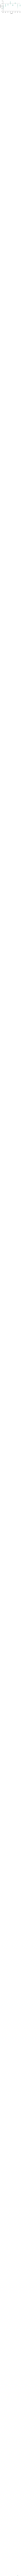

In [56]:
# plot 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(6,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3,10)

ax1 = fig.add_subplot(gs[0,0:8])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# set fontsize of axes 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 10)

Anhui_ferret25.replace([np.inf, -np.inf], np.nan, inplace=True)
Anhui_ferret27.replace([np.inf, -np.inf], np.nan, inplace=True)
Anhui_ferret28.replace([np.inf, -np.inf], np.nan, inplace=True)
Anhui_ferret29.replace([np.inf, -np.inf], np.nan, inplace=True)
Anhui_ferret31.replace([np.inf, -np.inf], np.nan, inplace=True)

Anhui_ferret31.plot(kind='line', linestyle='', marker='o', c='#3C7067', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
Anhui_ferret29.plot(kind='line', linestyle='', marker='o', c='#2A9D8F', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
Anhui_ferret28.plot(kind='line', linestyle='', marker='^', c='#AACCC6', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
Anhui_ferret27.plot(kind='line', linestyle='', marker='o', c='#AACCC6', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
Anhui_ferret25.plot(kind='line', linestyle='', marker='o', c='#ADEADE', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)

plt.axhline(y=1, color='grey', linestyle='--')

ax1.set_facecolor('white')
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_ylim(0.001,10)
ax1.set_yscale('log')
ax1.set_ylabel('piN / piS', fontname='Arial', fontsize=12)
ax1.set_xlabel('genes', fontname='Arial', fontsize=12)
ax1.set_xticklabels(['PB2','PB1','PA','HA','NP','NA','MP','NS'], fontname='Arial', fontsize=10, minor=False, rotation=45)
# ax1.legend(loc=0, frameon=False, fontsize=10, ncol=1)

plt.savefig('../figures/diversity/anhui-piN-over-piS.pdf', dpi=300)

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/pytho

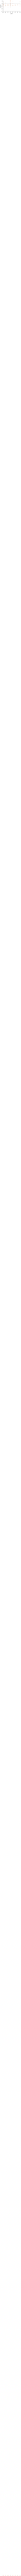

In [57]:
# plot 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(6,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3,10)

ax1 = fig.add_subplot(gs[0,0:8])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# set fontsize of axes 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 10)

CA04_ferret1.replace([np.inf, -np.inf], np.nan, inplace=True)
CA04_ferret2.replace([np.inf, -np.inf], np.nan, inplace=True)
CA04_ferret3.replace([np.inf, -np.inf], np.nan, inplace=True)
CA04_ferret4.replace([np.inf, -np.inf], np.nan, inplace=True)
CA04_ferret5.replace([np.inf, -np.inf], np.nan, inplace=True)
CA04_ferret6.replace([np.inf, -np.inf], np.nan, inplace=True)
CA04_ferret33.replace([np.inf, -np.inf], np.nan, inplace=True)
CA04_ferret35.replace([np.inf, -np.inf], np.nan, inplace=True)
CA04_ferret36.replace([np.inf, -np.inf], np.nan, inplace=True)

CA04_ferret1.plot(kind='line', linestyle='', marker='o', c='#DBBDAF', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
CA04_ferret2.plot(kind='line', linestyle='', marker='^', c='#DBBDAF', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
CA04_ferret3.plot(kind='line', linestyle='', marker='o', c='#E07558', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
CA04_ferret4.plot(kind='line', linestyle='', marker='^', c='#E07558', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
CA04_ferret5.plot(kind='line', linestyle='', marker='o', c='#893F0C', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
CA04_ferret6.plot(kind='line', linestyle='', marker='^', c='#893F0C', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
CA04_ferret33.plot(kind='line', linestyle='', marker='o', c='#F9A66E', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
CA04_ferret35.plot(kind='line', linestyle='', marker='o', c='#C15D1A', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
CA04_ferret36.plot(kind='line', linestyle='', marker='^', c='#C15D1A', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)

plt.axhline(y=1, color='grey', linestyle='--')

ax1.set_facecolor('white')
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_ylim(0.001,10)
ax1.set_yscale('log')
ax1.set_ylabel('piN / piS', fontname='Arial', fontsize=12)
ax1.set_xlabel('genes', fontname='Arial', fontsize=12)
ax1.set_xticklabels(['PB2','PB1','PA','HA','NP','NA','MP','NS'], fontname='Arial', fontsize=10, minor=False, rotation=45)
# ax1.legend(loc=0, frameon=False, fontsize=10, ncol=1)

plt.savefig('../figures/diversity/CA04-piN-over-piS.pdf', dpi=300)

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/pytho

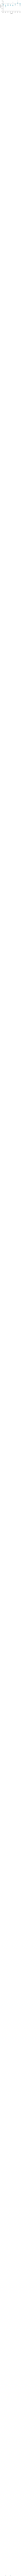

In [58]:
# plot 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(6,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3,10)

ax1 = fig.add_subplot(gs[0,0:8])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# set fontsize of axes 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 10)

GD3_ferret1.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret3.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret4.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret5.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret7.replace([np.inf, -np.inf], np.nan, inplace=True)

GD3_ferret1.plot(kind='line', linestyle='', marker='o', c='#264653', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret3.plot(kind='line', linestyle='', marker='o', c='#447F91', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret4.plot(kind='line', linestyle='', marker='^', c='#447F91', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret5.plot(kind='line', linestyle='', marker='o', c='#87B6C1', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret7.plot(kind='line', linestyle='', marker='o', c='#00A1C6', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)

plt.axhline(y=1, color='grey', linestyle='--')

ax1.set_facecolor('white')
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_ylim(0.001,10)
ax1.set_yscale('log')
ax1.set_ylabel('piN / piS', fontname='Arial', fontsize=12)
ax1.set_xlabel('genes', fontname='Arial', fontsize=12)
ax1.set_xticklabels(['PB2','PB1','PA','HA','NP','NA','MP','NS'], fontname='Arial', fontsize=10, minor=False, rotation=45)
# ax1.legend(loc=0, frameon=False, fontsize=10, ncol=1)

plt.savefig('../figures/diversity/GD3-piN-over-piS.pdf', dpi=300)

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/pytho

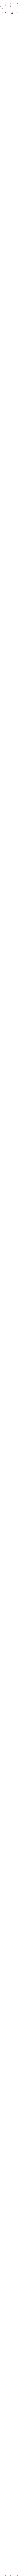

In [59]:
# plot 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(6,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3,10)

ax1 = fig.add_subplot(gs[0,0:8])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# set fontsize of axes 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 10)

GD3_ferret9.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret10.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret11.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret12.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret13.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret15.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret16.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret17.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret18.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret19.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret21.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret22.replace([np.inf, -np.inf], np.nan, inplace=True)
GD3_ferret23.replace([np.inf, -np.inf], np.nan, inplace=True)

GD3_ferret9.plot(kind='line', linestyle='', marker='o', c='#890B0B', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret10.plot(kind='line', linestyle='', marker='^', c='#890B0B', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret11.plot(kind='line', linestyle='', marker='o', c='#7A4D4D', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret12.plot(kind='line', linestyle='', marker='^', c='#7A4D4D', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret13.plot(kind='line', linestyle='', marker='o', c='#F90808', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret15.plot(kind='line', linestyle='', marker='o', c='#F95858', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret16.plot(kind='line', linestyle='', marker='^', c='#F95858', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret17.plot(kind='line', linestyle='', marker='o', c='#D68AA9', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret18.plot(kind='line', linestyle='', marker='^', c='#D68AA9', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret19.plot(kind='line', linestyle='', marker='o', c='#B74277', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret21.plot(kind='line', linestyle='', marker='o', c='#911453', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret22.plot(kind='line', linestyle='', marker='^', c='#911453', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)
GD3_ferret23.plot(kind='line', linestyle='', marker='o', c='#EF358A', markerfacecolor='none', legend=False, ax=ax1, clip_on=False)

plt.axhline(y=1, color='grey', linestyle='--')

ax1.set_facecolor('white')
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_ylim(0.001,10)
ax1.set_yscale('log')
ax1.set_ylabel('piN / piS', fontname='Arial', fontsize=12)
ax1.set_xlabel('genes', fontname='Arial', fontsize=12)
ax1.set_xticklabels(['PB2','PB1','PA','HA','NP','NA','MP','NS'], fontname='Arial', fontsize=10, minor=False, rotation=45)
# ax1.legend(loc=0, frameon=False, fontsize=10, ncol=1)

plt.savefig('../figures/diversity/rGD3-piN-over-piS.pdf', dpi=300)

#

In [60]:
def combine_genes(ferret): 
    PB2 = pd.read_csv('../data_derived/diversity/' + ferret + '/PB2.txt', sep='\t')
    PB2 = PB2[['piN','piS']]
    PB2['gene'] = 'PB2'
    PB1 = pd.read_csv('../data_derived/diversity/' + ferret + '/PB1.txt', sep='\t')
    PB1 = PB1[['piN','piS']]
    PB1['gene'] = 'PB1'
    PA = pd.read_csv('../data_derived/diversity/' + ferret + '/PA.txt', sep='\t')
    PA = PA[['piN','piS']]
    PA['gene'] = 'PA'
    HA = pd.read_csv('../data_derived/diversity/' + ferret + '/HA.txt', sep='\t')
    HA = HA[['piN','piS']]
    HA['gene'] = 'HA'
    NP = pd.read_csv('../data_derived/diversity/' + ferret + '/NP.txt', sep='\t')
    NP = NP[['piN','piS']]
    NP['gene'] = 'NP'
    NA = pd.read_csv('../data_derived/diversity/' + ferret + '/NA.txt', sep='\t')
    NA = NA[['piN','piS']]
    NA['gene'] = 'NA'
    MP = pd.read_csv('../data_derived/diversity/' + ferret + '/MP.txt', sep='\t')
    MP = MP[['piN','piS']]
    MP['gene'] = 'MP'
    NS = pd.read_csv('../data_derived/diversity/' + ferret + '/NS.txt', sep='\t')
    NS = NS[['piN','piS']]
    NS['gene'] = 'NS'
    
    ferret = pd.concat([PB2,PB1,PA,HA,NP,NA,MP,NS])
    
#     ferret['piN/piS'] = ferret['piN'] / ferret['piS']
    ferret = ferret.set_index('gene')
    
    return(ferret)    

#

In [61]:
Anhui_ferret25_day1 = combine_genes('Anhui_ferret25_day1')
Anhui_ferret25_day3 = combine_genes('Anhui_ferret25_day3')
Anhui_ferret25_day5 = combine_genes('Anhui_ferret25_day5')
Anhui_ferret25_day7 = combine_genes('Anhui_ferret25_day7')

Anhui_ferret27_day1 = combine_genes('Anhui_ferret27_day1')
Anhui_ferret27_day3 = combine_genes('Anhui_ferret27_day3')
Anhui_ferret27_day5 = combine_genes('Anhui_ferret27_day5')
Anhui_ferret27_day7 = combine_genes('Anhui_ferret27_day7')

Anhui_ferret28_day3 = combine_genes('Anhui_ferret28_day3')
Anhui_ferret28_day5 = combine_genes('Anhui_ferret28_day5')
Anhui_ferret28_day7 = combine_genes('Anhui_ferret28_day7')

Anhui_ferret29_day1 = combine_genes('Anhui_ferret29_day1')
Anhui_ferret29_day3 = combine_genes('Anhui_ferret29_day3')
Anhui_ferret29_day5 = combine_genes('Anhui_ferret29_day5')
Anhui_ferret29_day7 = combine_genes('Anhui_ferret29_day7')

Anhui_ferret31_day1 = combine_genes('Anhui_ferret31_day1')
Anhui_ferret31_day3 = combine_genes('Anhui_ferret31_day3')
Anhui_ferret31_day5 = combine_genes('Anhui_ferret31_day5')

In [62]:
Anhui_ferret25 = pd.concat([Anhui_ferret25_day1,Anhui_ferret25_day3,Anhui_ferret25_day5,Anhui_ferret25_day7]).groupby(level=0).mean()
Anhui_ferret27 = pd.concat([Anhui_ferret27_day1,Anhui_ferret27_day3,Anhui_ferret27_day5,Anhui_ferret27_day7]).groupby(level=0).mean()
Anhui_ferret28 = pd.concat([Anhui_ferret28_day3,Anhui_ferret28_day5,Anhui_ferret28_day7]).groupby(level=0).mean()
Anhui_ferret29 = pd.concat([Anhui_ferret29_day1,Anhui_ferret29_day3,Anhui_ferret29_day5,Anhui_ferret29_day7]).groupby(level=0).mean()
Anhui_ferret31 = pd.concat([Anhui_ferret31_day1,Anhui_ferret31_day3,Anhui_ferret31_day5]).groupby(level=0).mean()

#

In [63]:
from scipy.stats import ttest_ind

Anhui = Anhui_ferret25.join(Anhui_ferret27,how='outer',rsuffix='_1')
Anhui = Anhui.join(Anhui_ferret28,how='outer',rsuffix='_2')
Anhui = Anhui.join(Anhui_ferret29,how='outer',rsuffix='_3')
Anhui = Anhui.join(Anhui_ferret31,how='outer',rsuffix='_4')

Anhui.replace([np.inf, -np.inf], np.nan, inplace=True)

Anhui['all_piN'] = Anhui[['piN','piN_1','piN_2','piN_3','piN_4']].values.tolist()
Anhui['all_piS'] = Anhui[['piS','piS_1','piS_2','piS_3','piS_4']].values.tolist()

Anhui = Anhui[['all_piN','all_piS']]

PB2 = Anhui.loc[['PB2']]
PB2_N = PB2['all_piN'].tolist()
PB2_N = PB2_N[0]
PB2_S = PB2['all_piS'].tolist()
PB2_S = PB2_S[0]

PB1 = Anhui.loc[['PB1']]
PB1_N = PB1['all_piN'].tolist()
PB1_N = PB1_N[0]
PB1_S = PB1['all_piS'].tolist()
PB1_S = PB1_S[0]

PA = Anhui.loc[['PA']]
PA_N = PA['all_piN'].tolist()
PA_N = PA_N[0]
PA_S = PA['all_piS'].tolist()
PA_S = PA_S[0]

HA = Anhui.loc[['HA']]
HA_N = HA['all_piN'].tolist()
HA_N = HA_N[0]
HA_S = HA['all_piS'].tolist()
HA_S = HA_S[0]

NP = Anhui.loc[['NP']]
NP_N = NP['all_piN'].tolist()
NP_N = NP_N[0]
NP_S = NP['all_piS'].tolist()
NP_S = NP_S[0]

NA = Anhui.loc[['NA']]
NA_N = NA['all_piN'].tolist()
NA_N = NA_N[0]
NA_S = NA['all_piS'].tolist()
NA_S = NA_S[0]

MP = Anhui.loc[['MP']]
MP_N = MP['all_piN'].tolist()
MP_N = MP_N[0]
MP_S = MP['all_piS'].tolist()
MP_S = MP_S[0]

NS = Anhui.loc[['NS']]
NS_N = NS['all_piN'].tolist()
NS_N = NS_N[0]
NS_S = NS['all_piS'].tolist()
NS_S = NS_S[0]

print("PB2 :", ttest_ind(PB2_N, PB2_S))
print("PB1 :", ttest_ind(PB1_N, PB1_S))
print("PA :", ttest_ind(PA_N, PA_S))
print("HA :", ttest_ind(HA_N, HA_S))
print("NP :", ttest_ind(NP_N, NP_S))
print("NA :", ttest_ind(NA_N, NA_S))
print("MP :", ttest_ind(MP_N, MP_S))
print("NS :", ttest_ind(NS_N, NS_S))

PB2 : Ttest_indResult(statistic=-4.132356205313468, pvalue=0.0032877760532593397)
PB1 : Ttest_indResult(statistic=-3.796153577260662, pvalue=0.005265438833898044)
PA : Ttest_indResult(statistic=-2.4183912057503725, pvalue=0.041955269189416375)
HA : Ttest_indResult(statistic=0.04771418611604646, pvalue=0.963113686898659)
NP : Ttest_indResult(statistic=-3.8912764399013438, pvalue=0.004600930361853266)
NA : Ttest_indResult(statistic=0.636189511043536, pvalue=0.5424216514657492)
MP : Ttest_indResult(statistic=-3.3058052269465725, pvalue=0.010765288831029297)
NS : Ttest_indResult(statistic=-3.0177908469948367, pvalue=0.01661526200046513)


In [64]:
CA04_ferret1_day1 = combine_genes('CA04_ferret1_day1')
CA04_ferret1_day3 = combine_genes('CA04_ferret1_day3')
CA04_ferret1_day5 = combine_genes('CA04_ferret1_day5')

CA04_ferret2_day1 = combine_genes('CA04_ferret2_day1')
CA04_ferret2_day3 = combine_genes('CA04_ferret2_day3')
CA04_ferret2_day5 = combine_genes('CA04_ferret2_day5')

CA04_ferret3_day1 = combine_genes('CA04_ferret3_day1')
CA04_ferret3_day3 = combine_genes('CA04_ferret3_day3')
CA04_ferret3_day5 = combine_genes('CA04_ferret3_day5')

CA04_ferret4_day3 = combine_genes('CA04_ferret4_day3')
CA04_ferret4_day5 = combine_genes('CA04_ferret4_day5')

CA04_ferret5_day1 = combine_genes('CA04_ferret5_day1')
CA04_ferret5_day3 = combine_genes('CA04_ferret5_day3')
CA04_ferret5_day5 = combine_genes('CA04_ferret5_day5')

CA04_ferret6_day3 = combine_genes('CA04_ferret6_day3')
CA04_ferret6_day5 = combine_genes('CA04_ferret6_day5')

CA04_ferret33_day1 = combine_genes('CA04_ferret33_day1')
CA04_ferret33_day3 = combine_genes('CA04_ferret33_day3')
CA04_ferret33_day5 = combine_genes('CA04_ferret33_day5')
CA04_ferret33_day7 = combine_genes('CA04_ferret33_day7')

CA04_ferret35_day1 = combine_genes('CA04_ferret35_day1')
CA04_ferret35_day3 = combine_genes('CA04_ferret35_day3')
CA04_ferret35_day5 = combine_genes('CA04_ferret35_day5')

CA04_ferret36_day3 = combine_genes('CA04_ferret36_day3')
CA04_ferret36_day5 = combine_genes('CA04_ferret36_day5')

In [65]:
CA04_ferret1 = pd.concat([CA04_ferret1_day1,CA04_ferret1_day3,CA04_ferret1_day5]).groupby(level=0).mean()
CA04_ferret2 = pd.concat([CA04_ferret2_day1,CA04_ferret2_day3,CA04_ferret2_day5]).groupby(level=0).mean()
CA04_ferret3 = pd.concat([CA04_ferret3_day1,CA04_ferret3_day3,CA04_ferret3_day5]).groupby(level=0).mean()
CA04_ferret4 = pd.concat([CA04_ferret4_day3,CA04_ferret4_day5]).groupby(level=0).mean()
CA04_ferret5 = pd.concat([CA04_ferret5_day1,CA04_ferret5_day3,CA04_ferret5_day5]).groupby(level=0).mean()
CA04_ferret6 = pd.concat([CA04_ferret6_day3,CA04_ferret6_day5]).groupby(level=0).mean()
CA04_ferret33 = pd.concat([CA04_ferret33_day1,CA04_ferret33_day3,CA04_ferret33_day5,CA04_ferret33_day7]).groupby(level=0).mean()
CA04_ferret35 = pd.concat([CA04_ferret35_day1,CA04_ferret35_day3,CA04_ferret35_day5]).groupby(level=0).mean()
CA04_ferret36 = pd.concat([CA04_ferret36_day3,CA04_ferret36_day5]).groupby(level=0).mean()


In [66]:
from scipy.stats import ttest_ind

CA04 = CA04_ferret1.join(CA04_ferret2,how='outer',rsuffix='_1')
CA04 = CA04.join(CA04_ferret3,how='outer',rsuffix='_2')
CA04 = CA04.join(CA04_ferret4,how='outer',rsuffix='_3')
CA04 = CA04.join(CA04_ferret5,how='outer',rsuffix='_4')
CA04 = CA04.join(CA04_ferret6,how='outer',rsuffix='_5')
CA04 = CA04.join(CA04_ferret33,how='outer',rsuffix='_6')
CA04 = CA04.join(CA04_ferret35,how='outer',rsuffix='_7')
CA04 = CA04.join(CA04_ferret36,how='outer',rsuffix='_8')

CA04.replace([np.inf, -np.inf], np.nan, inplace=True)

CA04['all_piN'] = CA04[['piN','piN_1','piN_2','piN_3','piN_4','piN_5','piN_6','piN_7','piN_8']].values.tolist()
CA04['all_piS'] = CA04[['piS','piS_1','piS_2','piS_3','piS_4','piS_5','piS_6','piS_7','piS_8']].values.tolist()

CA04 = CA04[['all_piN','all_piS']]

PB2 = CA04.loc[['PB2']]
PB2_N = PB2['all_piN'].tolist()
PB2_N = PB2_N[0]
PB2_S = PB2['all_piS'].tolist()
PB2_S = PB2_S[0]

PB1 = CA04.loc[['PB1']]
PB1_N = PB1['all_piN'].tolist()
PB1_N = PB1_N[0]
PB1_S = PB1['all_piS'].tolist()
PB1_S = PB1_S[0]

PA = CA04.loc[['PA']]
PA_N = PA['all_piN'].tolist()
PA_N = PA_N[0]
PA_S = PA['all_piS'].tolist()
PA_S = PA_S[0]

HA = CA04.loc[['HA']]
HA_N = HA['all_piN'].tolist()
HA_N = HA_N[0]
HA_S = HA['all_piS'].tolist()
HA_S = HA_S[0]

NP = CA04.loc[['NP']]
NP_N = NP['all_piN'].tolist()
NP_N = NP_N[0]
NP_S = NP['all_piS'].tolist()
NP_S = NP_S[0]

NA = CA04.loc[['NA']]
NA_N = NA['all_piN'].tolist()
NA_N = NA_N[0]
NA_S = NA['all_piS'].tolist()
NA_S = NA_S[0]

MP = CA04.loc[['MP']]
MP_N = MP['all_piN'].tolist()
MP_N = MP_N[0]
MP_S = MP['all_piS'].tolist()
MP_S = MP_S[0]

NS = CA04.loc[['NS']]
NS_N = NS['all_piN'].tolist()
NS_N = NS_N[0]
NS_S = NS['all_piS'].tolist()
NS_S = NS_S[0]

print("PB2 :", ttest_ind(PB2_N, PB2_S))
print("PB1 :", ttest_ind(PB1_N, PB1_S))
print("PA :", ttest_ind(PA_N, PA_S))
print("HA :", ttest_ind(HA_N, HA_S))
print("NP :", ttest_ind(NP_N, NP_S))
print("NA :", ttest_ind(NA_N, NA_S))
print("MP :", ttest_ind(MP_N, MP_S))
print("NS :", ttest_ind(NS_N, NS_S))

PB2 : Ttest_indResult(statistic=-2.6063266240131764, pvalue=0.019093795583964842)
PB1 : Ttest_indResult(statistic=-1.0782755784449343, pvalue=0.2968992931049502)
PA : Ttest_indResult(statistic=-2.1933216937839624, pvalue=0.0434046364978313)
HA : Ttest_indResult(statistic=1.262110395525393, pvalue=0.22499705693304572)
NP : Ttest_indResult(statistic=-0.13706802881863517, pvalue=0.8926870052589767)
NA : Ttest_indResult(statistic=-2.2727905335262557, pvalue=0.03717871764185918)
MP : Ttest_indResult(statistic=-1.7725787509394113, pvalue=0.09533516010227827)
NS : Ttest_indResult(statistic=0.4631795763975155, pvalue=0.6494734501682418)


In [67]:
GD3_ferret1_day1 = combine_genes('GD3_ferret1_day1')
GD3_ferret1_day3 = combine_genes('GD3_ferret1_day3')
GD3_ferret1_day5 = combine_genes('GD3_ferret1_day5')
GD3_ferret1_day7 = combine_genes('GD3_ferret1_day7')

GD3_ferret3_day1 = combine_genes('GD3_ferret3_day1')
GD3_ferret3_day3 = combine_genes('GD3_ferret3_day3')
GD3_ferret3_day5 = combine_genes('GD3_ferret3_day5')
GD3_ferret3_day7 = combine_genes('GD3_ferret3_day7')

GD3_ferret4_day5 = combine_genes('GD3_ferret4_day5')
GD3_ferret4_day7 = combine_genes('GD3_ferret4_day7')
GD3_ferret4_day9 = combine_genes('GD3_ferret4_day9')
GD3_ferret4_day11 = combine_genes('GD3_ferret4_day11')

GD3_ferret5_day1 = combine_genes('GD3_ferret5_day1')
GD3_ferret5_day3 = combine_genes('GD3_ferret5_day3')
GD3_ferret5_day5 = combine_genes('GD3_ferret5_day5')
# GD3_ferret5_day7 = combine_genes('GD3_ferret5_day7')

GD3_ferret7_day1 = combine_genes('GD3_ferret7_day1')
GD3_ferret7_day3 = combine_genes('GD3_ferret7_day3')
GD3_ferret7_day5 = combine_genes('GD3_ferret7_day5')
GD3_ferret7_day7 = combine_genes('GD3_ferret7_day7')


In [68]:
GD3_ferret1 = pd.concat([GD3_ferret1_day1,GD3_ferret1_day3,GD3_ferret1_day5]).groupby(level=0).mean()
GD3_ferret3 = pd.concat([GD3_ferret3_day1,GD3_ferret3_day3,GD3_ferret3_day5,GD3_ferret3_day7]).groupby(level=0).mean()
GD3_ferret4 = pd.concat([GD3_ferret4_day5,GD3_ferret4_day7,GD3_ferret4_day9,GD3_ferret4_day11]).groupby(level=0).mean()
GD3_ferret5 = pd.concat([GD3_ferret5_day1,GD3_ferret5_day3,GD3_ferret5_day5]).groupby(level=0).mean()
GD3_ferret7 = pd.concat([GD3_ferret7_day1,GD3_ferret7_day3,GD3_ferret7_day5,GD3_ferret7_day7]).groupby(level=0).mean()


In [69]:
from scipy.stats import ttest_ind

GD3 = GD3_ferret1.join(GD3_ferret3,how='outer',rsuffix='_1')
GD3 = GD3.join(GD3_ferret4,how='outer',rsuffix='_2')
GD3 = GD3.join(GD3_ferret5,how='outer',rsuffix='_3')
GD3 = GD3.join(GD3_ferret7,how='outer',rsuffix='_4')

GD3.replace([np.inf, -np.inf], np.nan, inplace=True)

GD3['all_piN'] = GD3[['piN','piN_1','piN_2','piN_3','piN_4']].values.tolist()
GD3['all_piS'] = GD3[['piS','piS_1','piS_2','piS_3','piS_4']].values.tolist()

GD3 = GD3[['all_piN','all_piS']]

PB2 = GD3.loc[['PB2']]
PB2_N = PB2['all_piN'].tolist()
PB2_N = PB2_N[0]
PB2_S = PB2['all_piS'].tolist()
PB2_S = PB2_S[0]

PB1 = GD3.loc[['PB1']]
PB1_N = PB1['all_piN'].tolist()
PB1_N = PB1_N[0]
PB1_S = PB1['all_piS'].tolist()
PB1_S = PB1_S[0]

PA = GD3.loc[['PA']]
PA_N = PA['all_piN'].tolist()
PA_N = PA_N[0]
PA_S = PA['all_piS'].tolist()
PA_S = PA_S[0]

HA = GD3.loc[['HA']]
HA_N = HA['all_piN'].tolist()
HA_N = HA_N[0]
HA_S = HA['all_piS'].tolist()
HA_S = HA_S[0]

NP = GD3.loc[['NP']]
NP_N = NP['all_piN'].tolist()
NP_N = NP_N[0]
NP_S = NP['all_piS'].tolist()
NP_S = NP_S[0]

NA = GD3.loc[['NA']]
NA_N = NA['all_piN'].tolist()
NA_N = NA_N[0]
NA_S = NA['all_piS'].tolist()
NA_S = NA_S[0]

MP = GD3.loc[['MP']]
MP_N = MP['all_piN'].tolist()
MP_N = MP_N[0]
MP_S = MP['all_piS'].tolist()
MP_S = MP_S[0]

NS = GD3.loc[['NS']]
NS_N = NS['all_piN'].tolist()
NS_N = NS_N[0]
NS_S = NS['all_piS'].tolist()
NS_S = NS_S[0]

print("PB2 :", ttest_ind(PB2_N, PB2_S))
print("PB1 :", ttest_ind(PB1_N, PB1_S))
print("PA :", ttest_ind(PA_N, PA_S))
print("HA :", ttest_ind(HA_N, HA_S))
print("NP :", ttest_ind(NP_N, NP_S))
print("NA :", ttest_ind(NA_N, NA_S))
print("MP :", ttest_ind(MP_N, MP_S))
print("NS :", ttest_ind(NS_N, NS_S))

PB2 : Ttest_indResult(statistic=-2.5607146664138263, pvalue=0.03360957715742713)
PB1 : Ttest_indResult(statistic=-13.595547950919244, pvalue=8.237135836140618e-07)
PA : Ttest_indResult(statistic=-2.901775162099623, pvalue=0.019837635136677387)
HA : Ttest_indResult(statistic=-4.196566812402764, pvalue=0.0030106057485607264)
NP : Ttest_indResult(statistic=-2.9900329981517286, pvalue=0.017333074615453845)
NA : Ttest_indResult(statistic=-1.7233252017175058, pvalue=0.12312294607632043)
MP : Ttest_indResult(statistic=3.5269892053731695, pvalue=0.007766110078084073)
NS : Ttest_indResult(statistic=-3.041856134472698, pvalue=0.01601803295709196)


In [70]:
GD3_ferret9_day1 = combine_genes('GD3_ferret9_day1')
GD3_ferret9_day3 = combine_genes('GD3_ferret9_day3')
GD3_ferret9_day5 = combine_genes('GD3_ferret9_day5')
GD3_ferret9_day7 = combine_genes('GD3_ferret9_day7')

GD3_ferret10_day3 = combine_genes('GD3_ferret10_day3')
GD3_ferret10_day5 = combine_genes('GD3_ferret10_day5')
GD3_ferret10_day7 = combine_genes('GD3_ferret10_day7')
GD3_ferret10_day9 = combine_genes('GD3_ferret10_day9')

GD3_ferret11_day1 = combine_genes('GD3_ferret11_day1')
GD3_ferret11_day3 = combine_genes('GD3_ferret11_day3')

GD3_ferret12_day3 = combine_genes('GD3_ferret12_day3')
GD3_ferret12_day5 = combine_genes('GD3_ferret12_day5')

GD3_ferret13_day1 = combine_genes('GD3_ferret13_day1')
GD3_ferret13_day3 = combine_genes('GD3_ferret13_day3')
GD3_ferret13_day5 = combine_genes('GD3_ferret13_day5')

GD3_ferret15_day1 = combine_genes('GD3_ferret15_day1')
GD3_ferret15_day3 = combine_genes('GD3_ferret15_day3')
GD3_ferret15_day5 = combine_genes('GD3_ferret15_day5')
# GD3_ferret15_day7 = combine_genes('GD3_ferret15_day7')

GD3_ferret16_day3 = combine_genes('GD3_ferret16_day3')
GD3_ferret16_day5 = combine_genes('GD3_ferret16_day5')
GD3_ferret16_day7 = combine_genes('GD3_ferret16_day7')

GD3_ferret17_day1 = combine_genes('GD3_ferret17_day1')
GD3_ferret17_day3 = combine_genes('GD3_ferret17_day3')
GD3_ferret17_day5 = combine_genes('GD3_ferret17_day5')
GD3_ferret17_day7 = combine_genes('GD3_ferret17_day7')

GD3_ferret18_day11 = combine_genes('GD3_ferret18_day11')
GD3_ferret18_day13 = combine_genes('GD3_ferret18_day13')
GD3_ferret18_day15 = combine_genes('GD3_ferret18_day15')

GD3_ferret19_day1 = combine_genes('GD3_ferret19_day1')
GD3_ferret19_day3 = combine_genes('GD3_ferret19_day3')
GD3_ferret19_day5 = combine_genes('GD3_ferret19_day5')

GD3_ferret21_day1 = combine_genes('GD3_ferret21_day1')
GD3_ferret21_day3 = combine_genes('GD3_ferret21_day3')
GD3_ferret21_day5 = combine_genes('GD3_ferret21_day5')

GD3_ferret22_day3 = combine_genes('GD3_ferret22_day3')
GD3_ferret22_day5 = combine_genes('GD3_ferret22_day5')
GD3_ferret22_day7 = combine_genes('GD3_ferret22_day7')
# GD3_ferret22_day9 = combine_genes('GD3_ferret22_day9')

GD3_ferret23_day1 = combine_genes('GD3_ferret23_day1')
GD3_ferret23_day3 = combine_genes('GD3_ferret23_day3')
GD3_ferret23_day5 = combine_genes('GD3_ferret23_day5')
GD3_ferret23_day7 = combine_genes('GD3_ferret23_day7')

In [71]:
rGD3_ferret9 = pd.concat([GD3_ferret9_day1,GD3_ferret9_day3,GD3_ferret9_day5,GD3_ferret9_day7]).groupby(level=0).mean()
rGD3_ferret10 = pd.concat([GD3_ferret10_day3,GD3_ferret10_day5,GD3_ferret10_day7,GD3_ferret10_day9]).groupby(level=0).mean()
rGD3_ferret11 = pd.concat([GD3_ferret11_day1,GD3_ferret11_day3]).groupby(level=0).mean()
rGD3_ferret12 = pd.concat([GD3_ferret12_day3,GD3_ferret12_day5]).groupby(level=0).mean()
rGD3_ferret13 = pd.concat([GD3_ferret13_day1,GD3_ferret13_day3,GD3_ferret13_day5]).groupby(level=0).mean()
rGD3_ferret15 = pd.concat([GD3_ferret15_day1,GD3_ferret15_day3,GD3_ferret15_day5]).groupby(level=0).mean()
rGD3_ferret16 = pd.concat([GD3_ferret16_day3,GD3_ferret16_day5,GD3_ferret16_day7]).groupby(level=0).mean()
rGD3_ferret17 = pd.concat([GD3_ferret17_day1,GD3_ferret17_day3,GD3_ferret17_day5,GD3_ferret17_day7]).groupby(level=0).mean()
rGD3_ferret18 = pd.concat([GD3_ferret18_day11,GD3_ferret18_day13,GD3_ferret18_day15]).groupby(level=0).mean()
rGD3_ferret19 = pd.concat([GD3_ferret19_day1,GD3_ferret19_day3,GD3_ferret19_day5]).groupby(level=0).mean()
rGD3_ferret21 = pd.concat([GD3_ferret21_day1,GD3_ferret21_day3,GD3_ferret21_day5]).groupby(level=0).mean()
rGD3_ferret22 = pd.concat([GD3_ferret22_day3,GD3_ferret22_day5,GD3_ferret22_day7]).groupby(level=0).mean()
rGD3_ferret23 = pd.concat([GD3_ferret23_day1,GD3_ferret23_day3,GD3_ferret23_day5,GD3_ferret23_day7]).groupby(level=0).mean()

#

In [72]:
from scipy.stats import ttest_ind

rGD3 = rGD3_ferret9.join(rGD3_ferret10,how='outer',rsuffix='_1')
rGD3 = rGD3.join(rGD3_ferret11,how='outer',rsuffix='_2')
rGD3 = rGD3.join(rGD3_ferret12,how='outer',rsuffix='_3')
rGD3 = rGD3.join(rGD3_ferret13,how='outer',rsuffix='_4')
rGD3 = rGD3.join(rGD3_ferret15,how='outer',rsuffix='_5')
rGD3 = rGD3.join(rGD3_ferret16,how='outer',rsuffix='_6')
rGD3 = rGD3.join(rGD3_ferret17,how='outer',rsuffix='_7')
rGD3 = rGD3.join(rGD3_ferret18,how='outer',rsuffix='_8')
rGD3 = rGD3.join(rGD3_ferret19,how='outer',rsuffix='_9')
rGD3 = rGD3.join(rGD3_ferret21,how='outer',rsuffix='_10')
rGD3 = rGD3.join(rGD3_ferret22,how='outer',rsuffix='_11')
rGD3 = rGD3.join(rGD3_ferret23,how='outer',rsuffix='_12')

rGD3.replace([np.inf, -np.inf], np.nan, inplace=True)

rGD3['all_piN'] = rGD3[['piN','piN_1','piN_2','piN_3','piN_4','piN_5','piN_6','piN_7','piN_8','piN_9','piN_10','piN_11','piN_12']].values.tolist()
rGD3['all_piS'] = rGD3[['piS','piS_1','piS_2','piS_3','piS_4','piS_5','piS_6','piS_7','piS_8','piS_9','piS_10','piS_11','piS_12']].values.tolist()

rGD3 = rGD3[['all_piN','all_piS']]

PB2 = rGD3.loc[['PB2']]
PB2_N = PB2['all_piN'].tolist()
PB2_N = PB2_N[0]
PB2_S = PB2['all_piS'].tolist()
PB2_S = PB2_S[0]

PB1 = rGD3.loc[['PB1']]
PB1_N = PB1['all_piN'].tolist()
PB1_N = PB1_N[0]
PB1_S = PB1['all_piS'].tolist()
PB1_S = PB1_S[0]

PA = rGD3.loc[['PA']]
PA_N = PA['all_piN'].tolist()
PA_N = PA_N[0]
PA_S = PA['all_piS'].tolist()
PA_S = PA_S[0]

HA = rGD3.loc[['HA']]
HA_N = HA['all_piN'].tolist()
HA_N = HA_N[0]
HA_S = HA['all_piS'].tolist()
HA_S = HA_S[0]

NP = rGD3.loc[['NP']]
NP_N = NP['all_piN'].tolist()
NP_N = NP_N[0]
NP_S = NP['all_piS'].tolist()
NP_S = NP_S[0]

NA = rGD3.loc[['NA']]
NA_N = NA['all_piN'].tolist()
NA_N = NA_N[0]
NA_S = NA['all_piS'].tolist()
NA_S = NA_S[0]

MP = rGD3.loc[['MP']]
MP_N = MP['all_piN'].tolist()
MP_N = MP_N[0]
MP_S = MP['all_piS'].tolist()
MP_S = MP_S[0]

NS = rGD3.loc[['NS']]
NS_N = NS['all_piN'].tolist()
NS_N = NS_N[0]
NS_S = NS['all_piS'].tolist()
NS_S = NS_S[0]

print("PB2 :", ttest_ind(PB2_N, PB2_S))
print("PB1 :", ttest_ind(PB1_N, PB1_S))
print("PA :", ttest_ind(PA_N, PA_S))
print("HA :", ttest_ind(HA_N, HA_S))
print("NP :", ttest_ind(NP_N, NP_S))
print("NA :", ttest_ind(NA_N, NA_S))
print("MP :", ttest_ind(MP_N, MP_S))
print("NS :", ttest_ind(NS_N, NS_S))

PB2 : Ttest_indResult(statistic=-0.6089360674948519, pvalue=0.548288008236416)
PB1 : Ttest_indResult(statistic=-0.833015350807702, pvalue=0.413049514730941)
PA : Ttest_indResult(statistic=-0.9697000507504868, pvalue=0.3418677779579181)
HA : Ttest_indResult(statistic=-1.8501859509786251, pvalue=0.07663669146296434)
NP : Ttest_indResult(statistic=-1.5500139349357474, pvalue=0.13422566319499452)
NA : Ttest_indResult(statistic=-1.1406490448015918, pvalue=0.2652710602841971)
MP : Ttest_indResult(statistic=0.0675139140915371, pvalue=0.9467318999661722)
NS : Ttest_indResult(statistic=-1.061410562448827, pvalue=0.29906813112366454)


In [73]:
def combine_genes(ferret): 
    PB2 = pd.read_csv('../data_derived/diversity/' + ferret + '/PB2.txt', sep='\t')
    PB2 = PB2[['piN','piS']]
    PB2['gene'] = 'PB2'
    PB1 = pd.read_csv('../data_derived/diversity/' + ferret + '/PB1.txt', sep='\t')
    PB1 = PB1[['piN','piS']]
    PB1['gene'] = 'PB1'
    PA = pd.read_csv('../data_derived/diversity/' + ferret + '/PA.txt', sep='\t')
    PA = PA[['piN','piS']]
    PA['gene'] = 'PA'
    HA = pd.read_csv('../data_derived/diversity/' + ferret + '/HA.txt', sep='\t')
    HA = HA[['piN','piS']]
    HA['gene'] = 'HA'
    NP = pd.read_csv('../data_derived/diversity/' + ferret + '/NP.txt', sep='\t')
    NP = NP[['piN','piS']]
    NP['gene'] = 'NP'
    NA = pd.read_csv('../data_derived/diversity/' + ferret + '/NA.txt', sep='\t')
    NA = NA[['piN','piS']]
    NA['gene'] = 'NA'
    MP = pd.read_csv('../data_derived/diversity/' + ferret + '/MP.txt', sep='\t')
    MP = MP[['piN','piS']]
    MP['gene'] = 'MP'
    NS = pd.read_csv('../data_derived/diversity/' + ferret + '/NS.txt', sep='\t')
    NS = NS[['piN','piS']]
    NS['gene'] = 'NS'
    
    ferret = pd.concat([PB2,PB1,PA,HA,NP,NA,MP,NS])
    
#     ferret['piN/piS'] = ferret['piN'] / ferret['piS']
    ferret = ferret.set_index('gene')
    
    return(ferret)    

#

In [74]:
Anhui_ferret27_day1 = combine_genes('Anhui_ferret27_day1')
Anhui_ferret28_day3 = combine_genes('Anhui_ferret28_day3')

CA04_ferret1_day1 = combine_genes('CA04_ferret1_day1')
CA04_ferret2_day3 = combine_genes('CA04_ferret2_day3')

CA04_ferret3_day1 = combine_genes('CA04_ferret3_day1')
CA04_ferret4_day3 = combine_genes('CA04_ferret4_day3')

CA04_ferret5_day1 = combine_genes('CA04_ferret5_day1')
CA04_ferret6_day3 = combine_genes('CA04_ferret6_day3')

CA04_ferret35_day1 = combine_genes('CA04_ferret35_day1')
CA04_ferret36_day3 = combine_genes('CA04_ferret36_day3')

GD3_ferret3_day3 = combine_genes('GD3_ferret3_day3')
GD3_ferret4_day5 = combine_genes('GD3_ferret4_day5')

GD3_ferret9_day1 = combine_genes('GD3_ferret9_day1')
GD3_ferret10_day3 = combine_genes('GD3_ferret10_day3')

GD3_ferret11_day1 = combine_genes('GD3_ferret11_day1')
GD3_ferret12_day3 = combine_genes('GD3_ferret12_day3')

GD3_ferret15_day1 = combine_genes('GD3_ferret15_day1')
GD3_ferret16_day3 = combine_genes('GD3_ferret16_day3')

GD3_ferret17_day7 = combine_genes('GD3_ferret17_day7')
GD3_ferret18_day11 = combine_genes('GD3_ferret18_day11')

GD3_ferret21_day1 = combine_genes('GD3_ferret21_day1')
GD3_ferret22_day3 = combine_genes('GD3_ferret22_day3')

In [75]:
Anhui = Anhui_ferret27_day1.join(Anhui_ferret28_day3,how='outer',lsuffix='_i',rsuffix='_c')
GD3 = GD3_ferret3_day3.join(GD3_ferret4_day5,how='outer',lsuffix='_i',rsuffix='_c')
rGD3_1 = GD3_ferret9_day1.join(GD3_ferret10_day3,how='outer',lsuffix='_i',rsuffix='_c')
rGD3_2 = GD3_ferret11_day1.join(GD3_ferret12_day3,how='outer',lsuffix='_i',rsuffix='_c')
rGD3_3 = GD3_ferret15_day1.join(GD3_ferret16_day3,how='outer',lsuffix='_i',rsuffix='_c')
rGD3_4 = GD3_ferret17_day7.join(GD3_ferret18_day11,how='outer',lsuffix='_i',rsuffix='_c')
rGD3_5 = GD3_ferret21_day1.join(GD3_ferret22_day3,how='outer',lsuffix='_i',rsuffix='_c')
#
Anhui_i = Anhui[['piN_i','piS_i']]
Anhui_c = Anhui[['piN_c','piS_c']]

Anhui_i['class'] = 'index'
Anhui_c['class'] = 'contact'

Anhui_i_N = Anhui_i[['piN_i', 'class']]
Anhui_i_N['class'] = Anhui_i_N['class'].replace({'index':'index_nonsyn'})
Anhui_i_N.reset_index(inplace=True)

Anhui_i_S = Anhui_i[['piS_i', 'class']]
Anhui_i_S['class'] = Anhui_i_S['class'].replace({'index':'index_syn'})
Anhui_i_S.reset_index(inplace=True)

Anhui_c_N = Anhui_c[['piN_c', 'class']]
Anhui_c_N['class'] = Anhui_c_N['class'].replace({'contact':'contact_nonsyn'})
Anhui_c_N.reset_index(inplace=True)

Anhui_c_S = Anhui_c[['piS_c', 'class']]
Anhui_c_S['class'] = Anhui_c_S['class'].replace({'contact':'contact_syn'})
Anhui_c_S.reset_index(inplace=True)
#
GD3_i = GD3[['piN_i','piS_i']]
GD3_c = GD3[['piN_c','piS_c']]

GD3_i['class'] = 'index'
GD3_c['class'] = 'contact'

GD3_i_N = GD3_i[['piN_i', 'class']]
GD3_i_N['class'] = GD3_i_N['class'].replace({'index':'index_nonsyn'})
GD3_i_N.reset_index(inplace=True)

GD3_i_S = GD3_i[['piS_i', 'class']]
GD3_i_S['class'] = GD3_i_S['class'].replace({'index':'index_syn'})
GD3_i_S.reset_index(inplace=True)

GD3_c_N = GD3_c[['piN_c', 'class']]
GD3_c_N['class'] = GD3_c_N['class'].replace({'contact':'contact_nonsyn'})
GD3_c_N.reset_index(inplace=True)

GD3_c_S = GD3_c[['piS_c', 'class']]
GD3_c_S['class'] = GD3_c_S['class'].replace({'contact':'contact_syn'})
GD3_c_S.reset_index(inplace=True)
#
rGD3_1_i = rGD3_1[['piN_i','piS_i']]
rGD3_1_c = rGD3_1[['piN_c','piS_c']]

rGD3_1_i['class'] = 'index'
rGD3_1_c['class'] = 'contact'

rGD3_1_i_N = rGD3_1_i[['piN_i', 'class']]
rGD3_1_i_N['class'] = rGD3_1_i_N['class'].replace({'index':'index_nonsyn'})
rGD3_1_i_N.reset_index(inplace=True)

rGD3_1_i_S = rGD3_1_i[['piS_i', 'class']]
rGD3_1_i_S['class'] = rGD3_1_i_S['class'].replace({'index':'index_syn'})
rGD3_1_i_S.reset_index(inplace=True)

rGD3_1_c_N = rGD3_1_c[['piN_c', 'class']]
rGD3_1_c_N['class'] = rGD3_1_c_N['class'].replace({'contact':'contact_nonsyn'})
rGD3_1_c_N.reset_index(inplace=True)

rGD3_1_c_S = rGD3_1_c[['piS_c', 'class']]
rGD3_1_c_S['class'] = rGD3_1_c_S['class'].replace({'contact':'contact_syn'})
rGD3_1_c_S.reset_index(inplace=True)
#
rGD3_2_i = rGD3_2[['piN_i','piS_i']]
rGD3_2_c = rGD3_2[['piN_c','piS_c']]

rGD3_2_i['class'] = 'index'
rGD3_2_c['class'] = 'contact'

rGD3_2_i_N = rGD3_2_i[['piN_i', 'class']]
rGD3_2_i_N['class'] = rGD3_2_i_N['class'].replace({'index':'index_nonsyn'})
rGD3_2_i_N.reset_index(inplace=True)

rGD3_2_i_S = rGD3_2_i[['piS_i', 'class']]
rGD3_2_i_S['class'] = rGD3_2_i_S['class'].replace({'index':'index_syn'})
rGD3_2_i_S.reset_index(inplace=True)

rGD3_2_c_N = rGD3_2_c[['piN_c', 'class']]
rGD3_2_c_N['class'] = rGD3_2_c_N['class'].replace({'contact':'contact_nonsyn'})
rGD3_2_c_N.reset_index(inplace=True)

rGD3_2_c_S = rGD3_2_c[['piS_c', 'class']]
rGD3_2_c_S['class'] = rGD3_2_c_S['class'].replace({'contact':'contact_syn'})
rGD3_2_c_S.reset_index(inplace=True)
#
rGD3_3_i = rGD3_3[['piN_i','piS_i']]
rGD3_3_c = rGD3_3[['piN_c','piS_c']]

rGD3_3_i['class'] = 'index'
rGD3_3_c['class'] = 'contact'

rGD3_3_i_N = rGD3_3_i[['piN_i', 'class']]
rGD3_3_i_N['class'] = rGD3_3_i_N['class'].replace({'index':'index_nonsyn'})
rGD3_3_i_N.reset_index(inplace=True)

rGD3_3_i_S = rGD3_3_i[['piS_i', 'class']]
rGD3_3_i_S['class'] = rGD3_3_i_S['class'].replace({'index':'index_syn'})
rGD3_3_i_S.reset_index(inplace=True)

rGD3_3_c_N = rGD3_3_c[['piN_c', 'class']]
rGD3_3_c_N['class'] = rGD3_3_c_N['class'].replace({'contact':'contact_nonsyn'})
rGD3_3_c_N.reset_index(inplace=True)

rGD3_3_c_S = rGD3_3_c[['piS_c', 'class']]
rGD3_3_c_S['class'] = rGD3_3_c_S['class'].replace({'contact':'contact_syn'})
rGD3_3_c_S.reset_index(inplace=True)
#
rGD3_4_i = rGD3_4[['piN_i','piS_i']]
rGD3_4_c = rGD3_4[['piN_c','piS_c']]

rGD3_4_i['class'] = 'index'
rGD3_4_c['class'] = 'contact'

rGD3_4_i_N = rGD3_4_i[['piN_i', 'class']]
rGD3_4_i_N['class'] = rGD3_4_i_N['class'].replace({'index':'index_nonsyn'})
rGD3_4_i_N.reset_index(inplace=True)

rGD3_4_i_S = rGD3_4_i[['piS_i', 'class']]
rGD3_4_i_S['class'] = rGD3_4_i_S['class'].replace({'index':'index_syn'})
rGD3_4_i_S.reset_index(inplace=True)

rGD3_4_c_N = rGD3_4_c[['piN_c', 'class']]
rGD3_4_c_N['class'] = rGD3_4_c_N['class'].replace({'contact':'contact_nonsyn'})
rGD3_4_c_N.reset_index(inplace=True)

rGD3_4_c_S = rGD3_4_c[['piS_c', 'class']]
rGD3_4_c_S['class'] = rGD3_4_c_S['class'].replace({'contact':'contact_syn'})
rGD3_4_c_S.reset_index(inplace=True)
#
rGD3_5_i = rGD3_5[['piN_i','piS_i']]
rGD3_5_c = rGD3_5[['piN_c','piS_c']]

rGD3_5_i['class'] = 'index'
rGD3_5_c['class'] = 'contact'

rGD3_5_i_N = rGD3_5_i[['piN_i', 'class']]
rGD3_5_i_N['class'] = rGD3_5_i_N['class'].replace({'index':'index_nonsyn'})
rGD3_5_i_N.reset_index(inplace=True)

rGD3_5_i_S = rGD3_5_i[['piS_i', 'class']]
rGD3_5_i_S['class'] = rGD3_5_i_S['class'].replace({'index':'index_syn'})
rGD3_5_i_S.reset_index(inplace=True)

rGD3_5_c_N = rGD3_5_c[['piN_c', 'class']]
rGD3_5_c_N['class'] = rGD3_5_c_N['class'].replace({'contact':'contact_nonsyn'})
rGD3_5_c_N.reset_index(inplace=True)

rGD3_5_c_S = rGD3_5_c[['piS_c', 'class']]
rGD3_5_c_S['class'] = rGD3_5_c_S['class'].replace({'contact':'contact_syn'})
rGD3_5_c_S.reset_index(inplace=True)
#
H7N9 = pd.concat([Anhui_i_N,Anhui_c_N,GD3_i_N,GD3_c_N,rGD3_1_i_N,rGD3_1_c_N,rGD3_2_i_N,rGD3_2_c_N,rGD3_3_i_N,rGD3_3_c_N,rGD3_4_i_N,rGD3_4_c_N,rGD3_5_i_N,rGD3_5_c_N,Anhui_i_S,Anhui_c_S,GD3_i_S,GD3_c_S,rGD3_1_i_S,rGD3_1_c_S,rGD3_2_i_S,rGD3_2_c_S,rGD3_3_i_S,rGD3_3_c_S,rGD3_4_i_S,rGD3_4_c_S,rGD3_5_i_S,rGD3_5_c_S],axis=0)
H7N9['pi'] = H7N9['piN_c'].fillna(H7N9['piN_i'])
H7N9['pi'] = H7N9['pi'].fillna(H7N9['piS_i'])
H7N9['pi'] = H7N9['pi'].fillna(H7N9['piS_c'])
H7N9 = H7N9[['class','gene','pi']]

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/katbraun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:163: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



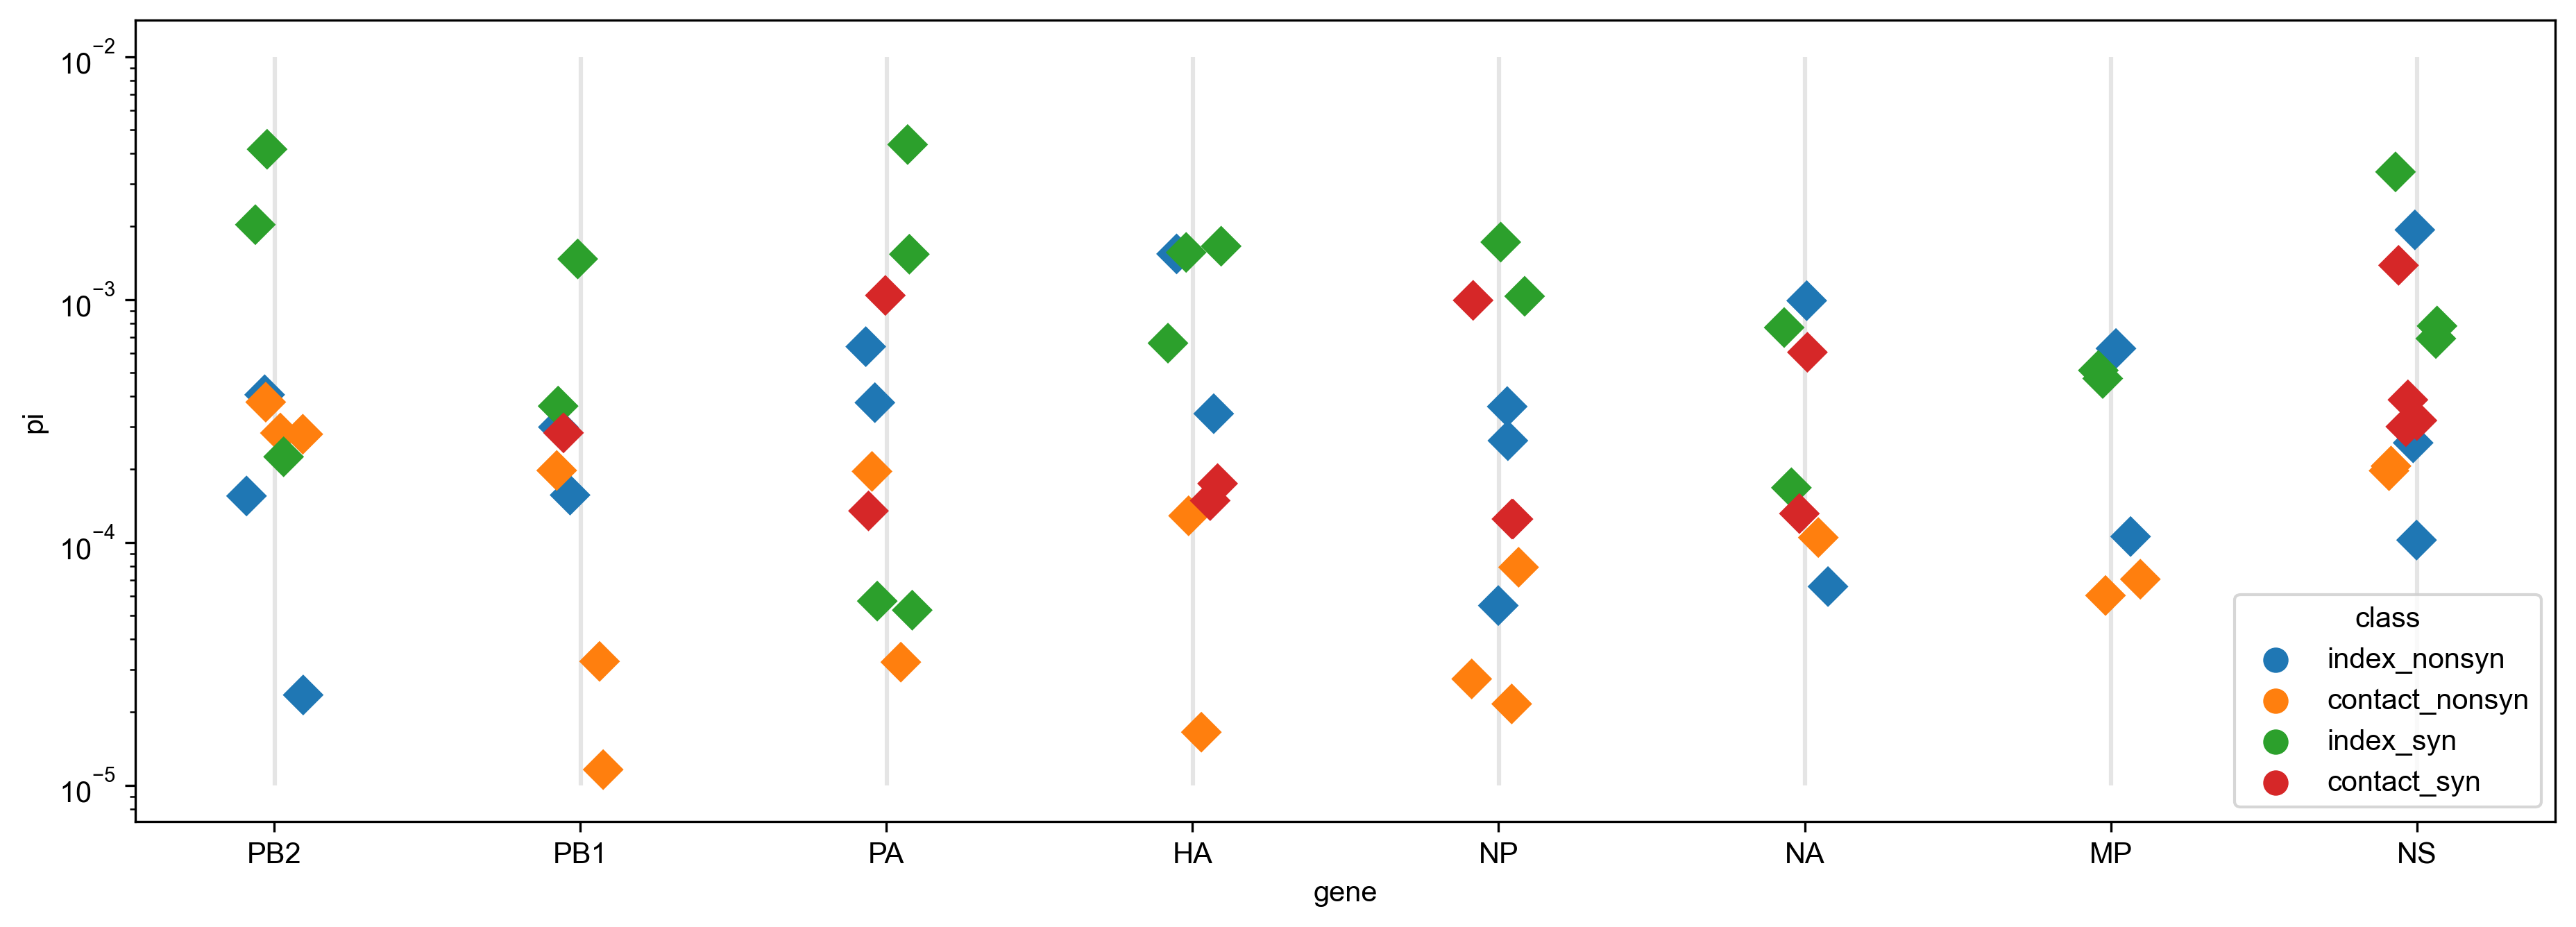

In [76]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Draw Plot
plt.figure(figsize=(15,5), dpi= 300)
g = sns.stripplot(x='gene', y='pi', data=H7N9, hue='class',s=10, marker='D')

for i in range(len(H7N9['gene'].unique())):
    plt.vlines(i+.001, 0.00001, 0.01, linestyles='solid', colors='gray', alpha=0.2)

g.set_yscale('log')
    
# plt.show()

plt.savefig('../figures/diversity/H7N9-pre-post-transmission.pdf', dpi=300)

#

In [77]:
CA04_1 = CA04_ferret1_day1.join(CA04_ferret2_day3,how='outer',lsuffix='_i',rsuffix='_c')
CA04_2 = CA04_ferret3_day1.join(CA04_ferret4_day3,how='outer',lsuffix='_i',rsuffix='_c')
CA04_3 = CA04_ferret5_day1.join(CA04_ferret6_day3,how='outer',lsuffix='_i',rsuffix='_c')
CA04_4 = CA04_ferret35_day1.join(CA04_ferret36_day3,how='outer',lsuffix='_i',rsuffix='_c')

#
CA04_1_i = CA04_1[['piN_i','piS_i']]
CA04_1_c = CA04_1[['piN_c','piS_c']]

CA04_1_i['class'] = 'index'
CA04_1_c['class'] = 'contact'

CA04_1_i_N = CA04_1_i[['piN_i', 'class']]
CA04_1_i_N['class'] = CA04_1_i_N['class'].replace({'index':'index_nonsyn'})
CA04_1_i_N.reset_index(inplace=True)

CA04_1_i_S = CA04_1_i[['piS_i', 'class']]
CA04_1_i_S['class'] = CA04_1_i_S['class'].replace({'index':'index_syn'})
CA04_1_i_S.reset_index(inplace=True)

CA04_1_c_N = CA04_1_c[['piN_c', 'class']]
CA04_1_c_N['class'] = CA04_1_c_N['class'].replace({'contact':'contact_nonsyn'})
CA04_1_c_N.reset_index(inplace=True)

CA04_1_c_S = CA04_1_c[['piS_c', 'class']]
CA04_1_c_S['class'] = CA04_1_c_S['class'].replace({'contact':'contact_syn'})
CA04_1_c_S.reset_index(inplace=True)

#
CA04_2_i = CA04_2[['piN_i','piS_i']]
CA04_2_c = CA04_2[['piN_c','piS_c']]

CA04_2_i['class'] = 'index'
CA04_2_c['class'] = 'contact'

CA04_2_i_N = CA04_2_i[['piN_i', 'class']]
CA04_2_i_N['class'] = CA04_2_i_N['class'].replace({'index':'index_nonsyn'})
CA04_2_i_N.reset_index(inplace=True)

CA04_2_i_S = CA04_2_i[['piS_i', 'class']]
CA04_2_i_S['class'] = CA04_2_i_S['class'].replace({'index':'index_syn'})
CA04_2_i_S.reset_index(inplace=True)

CA04_2_c_N = CA04_2_c[['piN_c', 'class']]
CA04_2_c_N['class'] = CA04_2_c_N['class'].replace({'contact':'contact_nonsyn'})
CA04_2_c_N.reset_index(inplace=True)

CA04_2_c_S = CA04_2_c[['piS_c', 'class']]
CA04_2_c_S['class'] = CA04_2_c_S['class'].replace({'contact':'contact_syn'})
CA04_2_c_S.reset_index(inplace=True)

#
CA04_3_i = CA04_3[['piN_i','piS_i']]
CA04_3_c = CA04_3[['piN_c','piS_c']]

CA04_3_i['class'] = 'index'
CA04_3_c['class'] = 'contact'

CA04_3_i_N = CA04_3_i[['piN_i', 'class']]
CA04_3_i_N['class'] = CA04_3_i_N['class'].replace({'index':'index_nonsyn'})
CA04_3_i_N.reset_index(inplace=True)

CA04_3_i_S = CA04_3_i[['piS_i', 'class']]
CA04_3_i_S['class'] = CA04_3_i_S['class'].replace({'index':'index_syn'})
CA04_3_i_S.reset_index(inplace=True)

CA04_3_c_N = CA04_3_c[['piN_c', 'class']]
CA04_3_c_N['class'] = CA04_3_c_N['class'].replace({'contact':'contact_nonsyn'})
CA04_3_c_N.reset_index(inplace=True)

CA04_3_c_S = CA04_3_c[['piS_c', 'class']]
CA04_3_c_S['class'] = CA04_3_c_S['class'].replace({'contact':'contact_syn'})
CA04_3_c_S.reset_index(inplace=True)

#
CA04_4_i = CA04_4[['piN_i','piS_i']]
CA04_4_c = CA04_4[['piN_c','piS_c']]

CA04_4_i['class'] = 'index'
CA04_4_c['class'] = 'contact'

CA04_4_i_N = CA04_4_i[['piN_i', 'class']]
CA04_4_i_N['class'] = CA04_4_i_N['class'].replace({'index':'index_nonsyn'})
CA04_4_i_N.reset_index(inplace=True)

CA04_4_i_S = CA04_4_i[['piS_i', 'class']]
CA04_4_i_S['class'] = CA04_4_i_S['class'].replace({'index':'index_syn'})
CA04_4_i_S.reset_index(inplace=True)

CA04_4_c_N = CA04_4_c[['piN_c', 'class']]
CA04_4_c_N['class'] = CA04_4_c_N['class'].replace({'contact':'contact_nonsyn'})
CA04_4_c_N.reset_index(inplace=True)

CA04_4_c_S = CA04_4_c[['piS_c', 'class']]
CA04_4_c_S['class'] = CA04_4_c_S['class'].replace({'contact':'contact_syn'})
CA04_4_c_S.reset_index(inplace=True)

#
CA04 = pd.concat([CA04_1_i_N,CA04_1_c_N,CA04_2_i_N,CA04_2_c_N,CA04_3_i_N,CA04_3_c_N,CA04_4_i_N,CA04_4_c_N,rGD3_5_i_N,rGD3_5_c_N,Anhui_i_S,Anhui_c_S,GD3_i_S,GD3_c_S,CA04_1_i_S,CA04_1_c_S,CA04_2_i_S,CA04_2_c_S,CA04_3_i_S,CA04_3_c_S,CA04_4_i_S,CA04_4_c_S,rGD3_5_i_S,rGD3_5_c_S],axis=0)
CA04['pi'] = CA04['piN_c'].fillna(CA04['piN_i'])
CA04['pi'] = CA04['pi'].fillna(CA04['piS_i'])
CA04['pi'] = CA04['pi'].fillna(CA04['piS_c'])
CA04 = CA04[['class','gene','pi']]

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/katbraun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:99: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



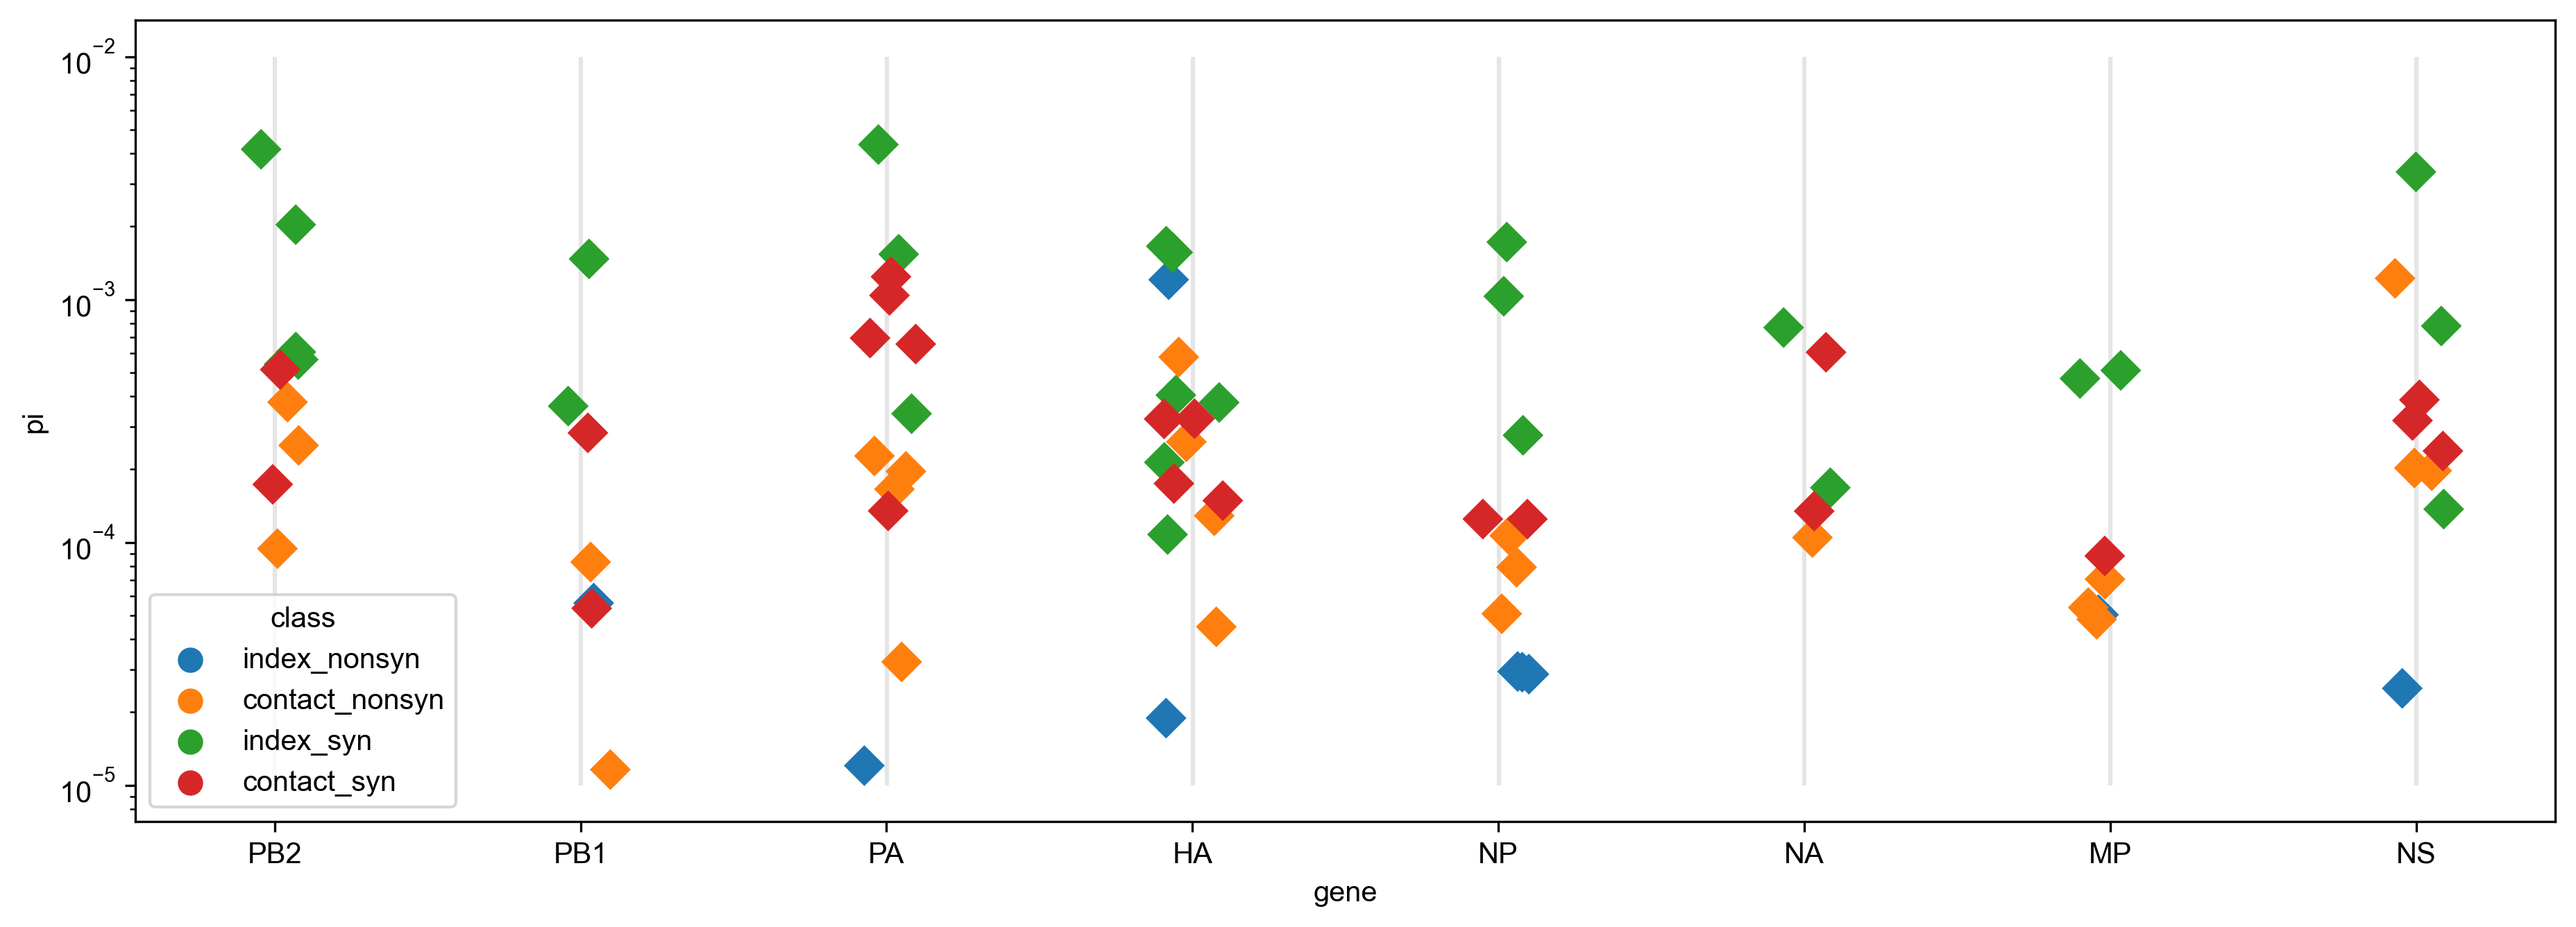

In [78]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Draw Plot
plt.figure(figsize=(15,5), dpi= 300)
g = sns.stripplot(x='gene', y='pi', data=CA04, hue='class',s=10, marker='D')

for i in range(len(CA04['gene'].unique())):
    plt.vlines(i+.001, 0.00001, 0.01, linestyles='solid', colors='gray', alpha=0.2)

g.set_yscale('log')
    
# plt.show()

plt.savefig('../figures/diversity/H1N1-pre-post-transmission.pdf', dpi=300)


#

In [84]:
H7N9['type'] = H7N9['gene'] + H7N9['class'] 
# H7N9 = H7N9[['type','pi']]
H7N9a = H7N9.set_index('type')

PB2_Ni = H7N9a.loc[['PB2index_nonsyn']]
PB2_Ni = PB2_Ni['pi'].tolist()

PB2_Nc = H7N9a.loc[['PB2contact_nonsyn']]
PB2_Nc = PB2_Nc['pi'].tolist()

PB2_Si = H7N9a.loc[['PB2index_syn']]
PB2_Si = PB2_Si['pi'].tolist()

PB2_Sc = H7N9a.loc[['PB2contact_syn']]
PB2_Sc = PB2_Sc['pi'].tolist()

PB1_Ni = H7N9a.loc[['PB1index_nonsyn']]
PB1_Ni = PB1_Ni['pi'].tolist()

PB1_Nc = H7N9a.loc[['PB1contact_nonsyn']]
PB1_Nc = PB1_Nc['pi'].tolist()

PB1_Si = H7N9a.loc[['PB1index_syn']]
PB1_Si = PB1_Si['pi'].tolist()

PB1_Sc = H7N9a.loc[['PB1contact_syn']]
PB1_Sc = PB1_Sc['pi'].tolist()

PA_Ni = H7N9a.loc[['PAindex_nonsyn']]
PA_Ni = PA_Ni['pi'].tolist()

PA_Nc = H7N9a.loc[['PAcontact_nonsyn']]
PA_Nc = PA_Nc['pi'].tolist()

PA_Si = H7N9a.loc[['PAindex_syn']]
PA_Si = PA_Si['pi'].tolist()

PA_Sc = H7N9a.loc[['PAcontact_syn']]
PA_Sc = PA_Sc['pi'].tolist()

HA_Ni = H7N9a.loc[['HAindex_nonsyn']]
HA_Ni = HA_Ni['pi'].tolist()

HA_Nc = H7N9a.loc[['HAcontact_nonsyn']]
HA_Nc = HA_Nc['pi'].tolist()

HA_Si = H7N9a.loc[['HAindex_syn']]
HA_Si = HA_Si['pi'].tolist()

HA_Sc = H7N9a.loc[['HAcontact_syn']]
HA_Sc = HA_Sc['pi'].tolist()

NP_Ni = H7N9a.loc[['NPindex_nonsyn']]
NP_Ni = NP_Ni['pi'].tolist()

NP_Nc = H7N9a.loc[['NPcontact_nonsyn']]
NP_Nc = NP_Nc['pi'].tolist()

NP_Si = H7N9a.loc[['NPindex_syn']]
NP_Si = NP_Si['pi'].tolist()

NP_Sc = H7N9a.loc[['NPcontact_syn']]
NP_Sc = NP_Sc['pi'].tolist()

NA_Ni = H7N9a.loc[['NAindex_nonsyn']]
NA_Ni = NA_Ni['pi'].tolist()

NA_Nc = H7N9a.loc[['NAcontact_nonsyn']]
NA_Nc = NA_Nc['pi'].tolist()

NA_Si = H7N9a.loc[['NAindex_syn']]
NA_Si = NA_Si['pi'].tolist()

NA_Sc = H7N9a.loc[['NAcontact_syn']]
NA_Sc = NA_Sc['pi'].tolist()

MP_Ni = H7N9a.loc[['MPindex_nonsyn']]
MP_Ni = MP_Ni['pi'].tolist()

MP_Nc = H7N9a.loc[['MPcontact_nonsyn']]
MP_Nc = MP_Nc['pi'].tolist()

MP_Si = H7N9a.loc[['MPindex_syn']]
MP_Si = MP_Si['pi'].tolist()

MP_Sc = H7N9a.loc[['MPcontact_syn']]
MP_Sc = MP_Sc['pi'].tolist()

NS_Ni = H7N9a.loc[['NSindex_nonsyn']]
NS_Ni = NS_Ni['pi'].tolist()

NS_Nc = H7N9a.loc[['NScontact_nonsyn']]
NS_Nc = NS_Nc['pi'].tolist()

NS_Si = H7N9a.loc[['NSindex_syn']]
NS_Si = NS_Si['pi'].tolist()

NS_Sc = H7N9a.loc[['NScontact_syn']]
NS_Sc = NS_Sc['pi'].tolist()

print("PB2 nonsyn:", ttest_rel(PB2_Ni, PB2_Nc))
print("PB1 nonsyn:", ttest_rel(PB1_Ni, PB1_Nc))
print("PA nonsyn :", ttest_rel(PA_Ni, PA_Nc))
print("HA nonsyn :", ttest_rel(HA_Ni, HA_Nc))
print("NP nonsyn :", ttest_rel(NP_Ni, NP_Nc))
print("NA nonsyn :", ttest_rel(NA_Ni, NA_Nc))
print("MP nonsyn :", ttest_rel(MP_Ni, MP_Nc))
print("NS nonsyn :", ttest_rel(NS_Ni, NS_Nc))

print("PB2 syn:", ttest_rel(PB2_Si, PB2_Sc))
print("PB1 syn:", ttest_rel(PB1_Si, PB1_Sc))
print("PA syn :", ttest_rel(PA_Si, PA_Sc))
print("HA syn :", ttest_rel(HA_Si, HA_Sc))
print("NP syn :", ttest_rel(NP_Si, NP_Sc))
print("NA syn :", ttest_rel(NA_Si, NA_Sc))
print("MP syn :", ttest_rel(MP_Si, MP_Sc))
print("NS syn :", ttest_rel(NS_Si, NS_Sc))

PB2 nonsyn: Ttest_relResult(statistic=-0.5300721111532195, pvalue=0.6150957194694495)
PB1 nonsyn: Ttest_relResult(statistic=0.5330834660192537, pvalue=0.6131335569386056)
PA nonsyn : Ttest_relResult(statistic=1.0748086425468788, pvalue=0.3237705911620122)
HA nonsyn : Ttest_relResult(statistic=1.1144333569979246, pvalue=0.30773251490016756)
NP nonsyn : Ttest_relResult(statistic=1.3169586119905132, pvalue=0.23591327011726643)
NA nonsyn : Ttest_relResult(statistic=0.9460704377749467, pvalue=0.38063763914418774)
MP nonsyn : Ttest_relResult(statistic=1.042758301820807, pvalue=0.3372415047024659)
NS nonsyn : Ttest_relResult(statistic=1.086889438126746, pvalue=0.3188091366245792)
PB2 syn: Ttest_relResult(statistic=1.5045674163051477, pvalue=0.18313713510856622)
PB1 syn: Ttest_relResult(statistic=1.3121095133405996, pvalue=0.23744394013311865)
PA syn : Ttest_relResult(statistic=1.0553107803702046, pvalue=0.3319120835711155)
HA syn : Ttest_relResult(statistic=1.7923365779778193, pvalue=0.123253

In [86]:
CA04['type'] = CA04['gene'] + CA04['class'] 
CA04a = CA04.set_index('type')

PB2_Ni = CA04a.loc[['PB2index_nonsyn']]
PB2_Ni = PB2_Ni['pi'].tolist()

PB2_Nc = CA04a.loc[['PB2contact_nonsyn']]
PB2_Nc = PB2_Nc['pi'].tolist()

PB2_Si = CA04a.loc[['PB2index_syn']]
PB2_Si = PB2_Si['pi'].tolist()

PB2_Sc = CA04a.loc[['PB2contact_syn']]
PB2_Sc = PB2_Sc['pi'].tolist()

PB1_Ni = CA04a.loc[['PB1index_nonsyn']]
PB1_Ni = PB1_Ni['pi'].tolist()

PB1_Nc = CA04a.loc[['PB1contact_nonsyn']]
PB1_Nc = PB1_Nc['pi'].tolist()

PB1_Si = CA04a.loc[['PB1index_syn']]
PB1_Si = PB1_Si['pi'].tolist()

PB1_Sc = CA04a.loc[['PB1contact_syn']]
PB1_Sc = PB1_Sc['pi'].tolist()

PA_Ni = CA04a.loc[['PAindex_nonsyn']]
PA_Ni = PA_Ni['pi'].tolist()

PA_Nc = CA04a.loc[['PAcontact_nonsyn']]
PA_Nc = PA_Nc['pi'].tolist()

PA_Si = CA04a.loc[['PAindex_syn']]
PA_Si = PA_Si['pi'].tolist()

PA_Sc = CA04a.loc[['PAcontact_syn']]
PA_Sc = PA_Sc['pi'].tolist()

HA_Ni = CA04a.loc[['HAindex_nonsyn']]
HA_Ni = HA_Ni['pi'].tolist()

HA_Nc = CA04a.loc[['HAcontact_nonsyn']]
HA_Nc = HA_Nc['pi'].tolist()

HA_Si = CA04a.loc[['HAindex_syn']]
HA_Si = HA_Si['pi'].tolist()

HA_Sc = CA04a.loc[['HAcontact_syn']]
HA_Sc = HA_Sc['pi'].tolist()

NP_Ni = CA04a.loc[['NPindex_nonsyn']]
NP_Ni = NP_Ni['pi'].tolist()

NP_Nc = CA04a.loc[['NPcontact_nonsyn']]
NP_Nc = NP_Nc['pi'].tolist()

NP_Si = CA04a.loc[['NPindex_syn']]
NP_Si = NP_Si['pi'].tolist()

NP_Sc = CA04a.loc[['NPcontact_syn']]
NP_Sc = NP_Sc['pi'].tolist()

NA_Ni = CA04a.loc[['NAindex_nonsyn']]
NA_Ni = NA_Ni['pi'].tolist()

NA_Nc = CA04a.loc[['NAcontact_nonsyn']]
NA_Nc = NA_Nc['pi'].tolist()

NA_Si = CA04a.loc[['NAindex_syn']]
NA_Si = NA_Si['pi'].tolist()

NA_Sc = CA04a.loc[['NAcontact_syn']]
NA_Sc = NA_Sc['pi'].tolist()

MP_Ni = CA04a.loc[['MPindex_nonsyn']]
MP_Ni = MP_Ni['pi'].tolist()

MP_Nc = CA04a.loc[['MPcontact_nonsyn']]
MP_Nc = MP_Nc['pi'].tolist()

MP_Si = CA04a.loc[['MPindex_syn']]
MP_Si = MP_Si['pi'].tolist()

MP_Sc = CA04a.loc[['MPcontact_syn']]
MP_Sc = MP_Sc['pi'].tolist()

NS_Ni = CA04a.loc[['NSindex_nonsyn']]
NS_Ni = NS_Ni['pi'].tolist()

NS_Nc = CA04a.loc[['NScontact_nonsyn']]
NS_Nc = NS_Nc['pi'].tolist()

NS_Si = CA04a.loc[['NSindex_syn']]
NS_Si = NS_Si['pi'].tolist()

NS_Sc = CA04a.loc[['NScontact_syn']]
NS_Sc = NS_Sc['pi'].tolist()

print("PB2 nonsyn:", ttest_rel(PB2_Ni, PB2_Nc))
print("PB1 nonsyn:", ttest_rel(PB1_Ni, PB1_Nc))
print("PA nonsyn :", ttest_rel(PA_Ni, PA_Nc))
print("HA nonsyn :", ttest_rel(HA_Ni, HA_Nc))
print("NP nonsyn :", ttest_rel(NP_Ni, NP_Nc))
print("NA nonsyn :", ttest_rel(NA_Ni, NA_Nc))
print("MP nonsyn :", ttest_rel(MP_Ni, MP_Nc))
print("NS nonsyn :", ttest_rel(NS_Ni, NS_Nc))

print("PB2 syn:", ttest_rel(PB2_Si, PB2_Sc))
print("PB1 syn:", ttest_rel(PB1_Si, PB1_Sc))
print("PA syn :", ttest_rel(PA_Si, PA_Sc))
print("HA syn :", ttest_rel(HA_Si, HA_Sc))
print("NP syn :", ttest_rel(NP_Si, NP_Sc))
print("NA syn :", ttest_rel(NA_Si, NA_Sc))
print("MP syn :", ttest_rel(MP_Si, MP_Sc))
print("NS syn :", ttest_rel(NS_Si, NS_Sc))

PB2 nonsyn: Ttest_relResult(statistic=-1.9488867162443864, pvalue=0.12311441216307117)
PB1 nonsyn: Ttest_relResult(statistic=-1.454395168197928, pvalue=0.2195192596739703)
PA nonsyn : Ttest_relResult(statistic=-2.6059698750109823, pvalue=0.059672224511552054)
HA nonsyn : Ttest_relResult(statistic=0.28077464847007544, pvalue=0.7928074696545356)
NP nonsyn : Ttest_relResult(statistic=-1.2095492478302405, pvalue=0.29304849442608416)
NA nonsyn : Ttest_relResult(statistic=-1.0, pvalue=0.373900966300059)
MP nonsyn : Ttest_relResult(statistic=-1.5641218208332495, pvalue=0.1928346339107504)
NS nonsyn : Ttest_relResult(statistic=-1.3844658965540098, pvalue=0.23843917648516544)
PB2 syn: Ttest_relResult(statistic=1.7473334937716354, pvalue=0.13117343159194003)
PB1 syn: Ttest_relResult(statistic=1.2531970692907586, pvalue=0.2567571758174774)
PA syn : Ttest_relResult(statistic=0.48443101759944235, pvalue=0.645255562242506)
HA syn : Ttest_relResult(statistic=1.7329863590437664, pvalue=0.1338014550792

In [87]:
# look at just pi pre/post transmission 

def combine_genes(ferret): 
    PB2 = pd.read_csv('../data_derived/diversity/' + ferret + '/PB2.txt', sep='\t')
    PB2 = PB2[['pi']]
    PB2['gene'] = 'PB2'
    PB1 = pd.read_csv('../data_derived/diversity/' + ferret + '/PB1.txt', sep='\t')
    PB1 = PB1[['pi']]
    PB1['gene'] = 'PB1'
    PA = pd.read_csv('../data_derived/diversity/' + ferret + '/PA.txt', sep='\t')
    PA = PA[['pi']]
    PA['gene'] = 'PA'
    HA = pd.read_csv('../data_derived/diversity/' + ferret + '/HA.txt', sep='\t')
    HA = HA[['pi']]
    HA['gene'] = 'HA'
    NP = pd.read_csv('../data_derived/diversity/' + ferret + '/NP.txt', sep='\t')
    NP = NP[['pi']]
    NP['gene'] = 'NP'
    NA = pd.read_csv('../data_derived/diversity/' + ferret + '/NA.txt', sep='\t')
    NA = NA[['pi']]
    NA['gene'] = 'NA'
    MP = pd.read_csv('../data_derived/diversity/' + ferret + '/MP.txt', sep='\t')
    MP = MP[['pi']]
    MP['gene'] = 'MP'
    NS = pd.read_csv('../data_derived/diversity/' + ferret + '/NS.txt', sep='\t')
    NS = NS[['pi']]
    NS['gene'] = 'NS'
    
    ferret = pd.concat([PB2,PB1,PA,HA,NP,NA,MP,NS])
    
#     ferret['piN/piS'] = ferret['piN'] / ferret['piS']
    ferret = ferret.set_index('gene')
    
    return(ferret) 



In [88]:
Anhui_ferret27_day1 = combine_genes('Anhui_ferret27_day1')
Anhui_ferret28_day3 = combine_genes('Anhui_ferret28_day3')

CA04_ferret1_day1 = combine_genes('CA04_ferret1_day1')
CA04_ferret2_day3 = combine_genes('CA04_ferret2_day3')

CA04_ferret3_day1 = combine_genes('CA04_ferret3_day1')
CA04_ferret4_day3 = combine_genes('CA04_ferret4_day3')

CA04_ferret5_day1 = combine_genes('CA04_ferret5_day1')
CA04_ferret6_day3 = combine_genes('CA04_ferret6_day3')

CA04_ferret35_day1 = combine_genes('CA04_ferret35_day1')
CA04_ferret36_day3 = combine_genes('CA04_ferret36_day3')

GD3_ferret3_day3 = combine_genes('GD3_ferret3_day3')
GD3_ferret4_day5 = combine_genes('GD3_ferret4_day5')

GD3_ferret9_day1 = combine_genes('GD3_ferret9_day1')
GD3_ferret10_day3 = combine_genes('GD3_ferret10_day3')

GD3_ferret11_day1 = combine_genes('GD3_ferret11_day1')
GD3_ferret12_day3 = combine_genes('GD3_ferret12_day3')

GD3_ferret15_day1 = combine_genes('GD3_ferret15_day1')
GD3_ferret16_day3 = combine_genes('GD3_ferret16_day3')

GD3_ferret17_day7 = combine_genes('GD3_ferret17_day7')
GD3_ferret18_day11 = combine_genes('GD3_ferret18_day11')

GD3_ferret21_day1 = combine_genes('GD3_ferret21_day1')
GD3_ferret22_day3 = combine_genes('GD3_ferret22_day3')

In [99]:
H7N9i = Anhui_ferret27_day1.join(GD3_ferret3_day3,how='outer',rsuffix='_1')
H7N9i = H7N9i.join(GD3_ferret9_day1,how='outer',rsuffix='_2')
H7N9i = H7N9i.join(GD3_ferret11_day1,how='outer',rsuffix='_3')
H7N9i = H7N9i.join(GD3_ferret15_day1,how='outer',rsuffix='_4')
H7N9i = H7N9i.join(GD3_ferret17_day7,how='outer',rsuffix='_5')
H7N9i = H7N9i.join(GD3_ferret21_day1,how='outer',rsuffix='_6')

H7N9c = Anhui_ferret28_day3.join(GD3_ferret4_day5,how='outer',rsuffix='_1')
H7N9c = H7N9c.join(GD3_ferret10_day3,how='outer',rsuffix='_2')
H7N9c = H7N9c.join(GD3_ferret12_day3,how='outer',rsuffix='_3')
H7N9c = H7N9c.join(GD3_ferret16_day3,how='outer',rsuffix='_4')
H7N9c = H7N9c.join(GD3_ferret18_day11,how='outer',rsuffix='_5')
H7N9c = H7N9c.join(GD3_ferret22_day3,how='outer',rsuffix='_6')

H7N9i['all_index'] = H7N9i[['pi','pi_1','pi_2','pi_3','pi_4','pi_5','pi_6']].values.tolist()
H7N9c['all_contact'] = H7N9c[['pi','pi_1','pi_2','pi_3','pi_4','pi_5','pi_6']].values.tolist()

PB2i = H7N9i.loc[['PB2']]
PB2i = PB2i['all_index'].tolist()
PB2i = PB2i[0]

PB2c = H7N9c.loc[['PB2']]
PB2c = PB2c['all_contact'].tolist()
PB2c = PB2c[0]

PB1i = H7N9i.loc[['PB1']]
PB1i = PB1i['all_index'].tolist()
PB1i = PB1i[0]

PB1c = H7N9c.loc[['PB1']]
PB1c = PB1c['all_contact'].tolist()
PB1c = PB1c[0]

PAi = H7N9i.loc[['PA']]
PAi = PAi['all_index'].tolist()
PAi = PAi[0]

PAc = H7N9c.loc[['PA']]
PAc = PAc['all_contact'].tolist()
PAc = PAc[0]

HAi = H7N9i.loc[['HA']]
HAi = HAi['all_index'].tolist()
HAi = HAi[0]

HAc = H7N9c.loc[['HA']]
HAc = HAc['all_contact'].tolist()
HAc = HAc[0]

NPi = H7N9i.loc[['NP']]
NPi = NPi['all_index'].tolist()
NPi = NPi[0]

NPc = H7N9c.loc[['NP']]
NPc = NPc['all_contact'].tolist()
NPc = NPc[0]

NAi = H7N9i.loc[['NA']]
NAi = NAi['all_index'].tolist()
NAi = NAi[0]

NAc = H7N9c.loc[['NA']]
NAc = NAc['all_contact'].tolist()
NAc = NAc[0]

MPi = H7N9i.loc[['MP']]
MPi = MPi['all_index'].tolist()
MPi = MPi[0]

MPc = H7N9c.loc[['MP']]
MPc = MPc['all_contact'].tolist()
MPc = MPc[0]

NSi = H7N9i.loc[['NS']]
NSi = NSi['all_index'].tolist()
NSi = NSi[0]

NSc = H7N9c.loc[['NS']]
NSc = NSc['all_contact'].tolist()
NSc = NSc[0]

print("PB2 :", ttest_rel(PB2i, PB2c))
print("PB1 :", ttest_rel(PB1i, PB1c))
print("PA :", ttest_rel(PAi, PAc))
print("HA :", ttest_rel(HAi, HAc))
print("NP :", ttest_rel(NPi, NPc))
print("NA :", ttest_rel(NAi, NAc))
print("MP :", ttest_rel(MPi, MPc))
print("NS :", ttest_rel(NSi, NSc))

print("whole genome :", ttest_rel(H7N9i['pi'], H7N9c['pi']))
#

PB2 : Ttest_relResult(statistic=0.9049355865663088, pvalue=0.4003753953529446)
PB1 : Ttest_relResult(statistic=0.9171875396864695, pvalue=0.3944162940929222)
PA : Ttest_relResult(statistic=1.0686635321431426, pvalue=0.32631863939215155)
HA : Ttest_relResult(statistic=1.3604149232161682, pvalue=0.2225856265221987)
NP : Ttest_relResult(statistic=0.9716194460756049, pvalue=0.368763681982212)
NA : Ttest_relResult(statistic=0.7794239560007977, pvalue=0.4653526939709748)
MP : Ttest_relResult(statistic=1.2130277827450886, pvalue=0.2707046163719)
NS : Ttest_relResult(statistic=0.9390788485113305, pvalue=0.38393834223114703)
whole genome : Ttest_relResult(statistic=3.974963797724135, pvalue=0.005358228190250749)


In [124]:
# plot pi values index > contact for H7N9 pairs (n=7)

H7N9i = H7N9i[['pi', 'pi_1', 'pi_2', 'pi_3', 'pi_4', 'pi_5', 'pi_6']]
H7N9c = H7N9c[['pi', 'pi_1', 'pi_2', 'pi_3', 'pi_4', 'pi_5', 'pi_6']]

H7N9i = H7N9i.rename(columns={'pi':'index_1', 'pi_1':'index_2', 'pi_2':'index_3', 'pi_3':'index_4', 'pi_4':'index_5', 'pi_5':'index_6', 'pi_6':'index_7'})
H7N9c = H7N9c.rename(columns={'pi':'contact_1', 'pi_1':'contact_2', 'pi_2':'contact_3', 'pi_3':'contact_4', 'pi_4':'contact_5', 'pi_5':'contact_6', 'pi_6':'contact_7'})

#

In [131]:
H7N9_1 = pd.concat([H7N9i['index_1'], H7N9c['contact_1']], axis=1)
H7N9_2 = pd.concat([H7N9i['index_2'], H7N9c['contact_2']], axis=1)
H7N9_3 = pd.concat([H7N9i['index_3'], H7N9c['contact_3']], axis=1)
H7N9_4 = pd.concat([H7N9i['index_4'], H7N9c['contact_4']], axis=1)
H7N9_5 = pd.concat([H7N9i['index_5'], H7N9c['contact_5']], axis=1)
H7N9_6 = pd.concat([H7N9i['index_6'], H7N9c['contact_6']], axis=1)
H7N9_7 = pd.concat([H7N9i['index_7'], H7N9c['contact_7']], axis=1)
#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/katbraun/anaconda3/lib/pytho

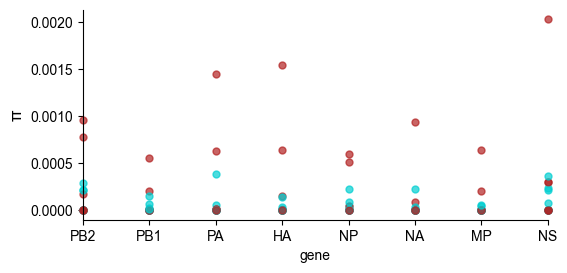

In [155]:
# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(6,6), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2,5)

ax1 = fig.add_subplot(gs[0,0:5])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# set fontsize of axes 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 10)

H7N9_1.plot(linestyle='', marker='.', markersize=10, ax=ax1, color=['firebrick', 'darkturquoise'], legend=False, alpha=0.7, clip_on=False)
H7N9_2.plot(linestyle='', marker='.', markersize=10, ax=ax1, color=['firebrick', 'darkturquoise'], legend=False, alpha=0.7, clip_on=False)
H7N9_3.plot(linestyle='', marker='.', markersize=10, ax=ax1, color=['firebrick', 'darkturquoise'], legend=False, alpha=0.7, clip_on=False)
H7N9_4.plot(linestyle='', marker='.', markersize=10, ax=ax1, color=['firebrick', 'darkturquoise'], legend=False, alpha=0.7, clip_on=False)
H7N9_5.plot(linestyle='', marker='.', markersize=10, ax=ax1, color=['firebrick', 'darkturquoise'], legend=False, alpha=0.7, clip_on=False)
H7N9_6.plot(linestyle='', marker='.', markersize=10, ax=ax1, color=['firebrick', 'darkturquoise'], legend=False, alpha=0.7, clip_on=False)
H7N9_7.plot(linestyle='', marker='.', markersize=10, ax=ax1, color=['firebrick', 'darkturquoise'], legend=False, alpha=0.7, clip_on=False)

ax1.set_facecolor('white')
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_ylabel('π', fontname='Arial', fontsize=12)

plt.savefig('../figures/diversity/π_prepost_transmission.pdf', dpi=300)

In [90]:
H1N1i = CA04_ferret1_day1.join(CA04_ferret3_day1,how='outer',rsuffix='_1')
H1N1i = H1N1i.join(CA04_ferret5_day1,how='outer',rsuffix='_2')
H1N1i = H1N1i.join(CA04_ferret35_day1,how='outer',rsuffix='_3')

H1N1c = CA04_ferret2_day3.join(CA04_ferret4_day3,how='outer',rsuffix='_1')
H1N1c = H1N1c.join(CA04_ferret6_day3,how='outer',rsuffix='_2')
H1N1c = H1N1c.join(CA04_ferret36_day3,how='outer',rsuffix='_3')

H1N1i['all_index'] = H1N1i[['pi','pi_1','pi_2','pi_3']].values.tolist()
H1N1c['all_contact'] = H1N1c[['pi','pi_1','pi_2','pi_3']].values.tolist()

PB2i = H1N1i.loc[['PB2']]
PB2i = PB2i['all_index'].tolist()
PB2i = PB2i[0]

PB2c = H1N1c.loc[['PB2']]
PB2c = PB2c['all_contact'].tolist()
PB2c = PB2c[0]

PB1i = H1N1i.loc[['PB1']]
PB1i = PB1i['all_index'].tolist()
PB1i = PB1i[0]

PB1c = H1N1c.loc[['PB1']]
PB1c = PB1c['all_contact'].tolist()
PB1c = PB1c[0]

PAi = H1N1i.loc[['PA']]
PAi = PAi['all_index'].tolist()
PAi = PAi[0]

PAc = H1N1c.loc[['PA']]
PAc = PAc['all_contact'].tolist()
PAc = PAc[0]

HAi = H1N1i.loc[['HA']]
HAi = HAi['all_index'].tolist()
HAi = HAi[0]

HAc = H1N1c.loc[['HA']]
HAc = HAc['all_contact'].tolist()
HAc = HAc[0]

NPi = H1N1i.loc[['NP']]
NPi = NPi['all_index'].tolist()
NPi = NPi[0]

NPc = H1N1c.loc[['NP']]
NPc = NPc['all_contact'].tolist()
NPc = NPc[0]

NAi = H1N1i.loc[['NA']]
NAi = NAi['all_index'].tolist()
NAi = NAi[0]

NAc = H1N1c.loc[['NA']]
NAc = NAc['all_contact'].tolist()
NAc = NAc[0]

MPi = H1N1i.loc[['MP']]
MPi = MPi['all_index'].tolist()
MPi = MPi[0]

MPc = H1N1c.loc[['MP']]
MPc = MPc['all_contact'].tolist()
MPc = MPc[0]

NSi = H1N1i.loc[['NS']]
NSi = NSi['all_index'].tolist()
NSi = NSi[0]

NSc = H1N1c.loc[['NS']]
NSc = NSc['all_contact'].tolist()
NSc = NSc[0]

print("PB2 :", ttest_rel(PB2i, PB2c))
print("PB1 :", ttest_rel(PB1i, PB1c))
print("PA :", ttest_rel(PAi, PAc))
print("HA :", ttest_rel(HAi, HAc))
print("NP :", ttest_rel(NPi, NPc))
print("NA :", ttest_rel(NAi, NAc))
print("MP :", ttest_rel(MPi, MPc))
print("NS :", ttest_rel(NSi, NSc))

print("whole genome :", ttest_rel(H1N1i['pi'], H1N1c['pi']))
#

PB2 : Ttest_relResult(statistic=-0.1112759107577675, pvalue=0.9184247490453998)
PB1 : Ttest_relResult(statistic=-1.0, pvalue=0.39100221895577053)
PA : Ttest_relResult(statistic=-3.5306659450822577, pvalue=0.038620795812286786)
HA : Ttest_relResult(statistic=0.6306440402108925, pvalue=0.5730408208454071)
NP : Ttest_relResult(statistic=0.11484753587260202, pvalue=0.9158214630657282)
NA : Ttest_relResult(statistic=-1.0000000000000002, pvalue=0.39100221895577053)
MP : Ttest_relResult(statistic=-1.729359054613548, pvalue=0.18218556378273537)
NS : Ttest_relResult(statistic=-1.2112515789378988, pvalue=0.31250894684149594)
whole genome : Ttest_relResult(statistic=-1.7442879250616778, pvalue=0.12462714555036632)
